# Projet 5
# Segmentez des clients d'un site e-commerce



## Problématique

- Peux-ton regrouper les différents clients par profils similaires à l'aide des données fournies par OLIST?

## Missions

- Réaliser une analyse exploratoire des données;
- Segmenter les différents clients par profils similaires à l'aide d'algorithmes non superviés;
- Évaluer la fréquence de mise à jour de la segmentation.

## Compétences évaluées

- Adapter les hyperparamètres d'un algorithme non supervisé afin de l'améliorer
- Évaluer les performances d’un modèle d'apprentissage non supervisé
- Mettre en place le modèle d'apprentissage non supervisé adapté au problème métier
- Transformer les variables pertinentes d'un modèle d'apprentissage non supervisé


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams["figure.figsize"]=20,20
sns.set_style("white")

## 1. Prémière analyse exploratoire des fichiers

In [2]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
product_category_name = pd.read_csv("product_category_name_translation.csv")

In [3]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [4]:
customers.shape

(99441, 5)

In [5]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
customers['customer_unique_id'].nunique()

96096

In [7]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [8]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [9]:
geolocation.shape

(1000163, 5)

In [10]:
geolocation['geolocation_zip_code_prefix'].nunique()

19015

In [11]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Plus de coordonnées que de clients ayant effectués une commande.

In [12]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [13]:
order_items.shape

(112650, 7)

In [14]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [16]:
order_items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [17]:
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [18]:
order_payments.shape

(103886, 5)

In [20]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [21]:
order_payments['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [22]:
order_payments['payment_installments'].unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23])

In [23]:
order_items['order_id'].nunique()

98666

In [24]:
order_payments['order_id'].nunique()

99440

In [25]:
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [26]:
order_reviews.shape

(100000, 7)

In [27]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [28]:
order_reviews['review_score'].unique()

array([4, 5, 1, 3, 2])

In [29]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [30]:
orders.shape

(99441, 8)

In [31]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [32]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [33]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [34]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [35]:
products.shape

(32951, 9)

In [36]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [37]:
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [38]:
sellers.shape

(3095, 4)

In [39]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [40]:
sellers['seller_id'].nunique()

3095

In [41]:
product_category_name.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [42]:
product_category_name.shape

(71, 2)

In [43]:
product_category_name.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [44]:
product_category_name['product_category_name_english'].nunique()

71

In [43]:
# Liste des fichiers

file_list = ['olist_customers_dataset.csv','olist_geolocation_dataset.csv','olist_order_items_dataset.csv',
            'olist_order_payments_dataset.csv','olist_order_reviews_dataset.csv','olist_orders_dataset.csv',
            'olist_products_dataset.csv','olist_sellers_dataset.csv','product_category_name_translation.csv']

# Liste des premières statistiques calculées


stat_list = ['Taille','Nbre ligne','Nbre colonne','Nbre NaN','Pourcentage de NaN']

stats_values = pd.DataFrame(columns=statList,index=fileList)

for ifil in file_list:
    print(ifil)
    
    data = pd.read_csv(ifil)
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    
    nbRows = data.shape[0]
    nbCols = data.shape[1]
    nbNaN = data.isna().sum().sum()
    pNaN = round(100.0 * nbNaN/data.size,2)
    
    stats_values.loc[ifil] = [data.size,nbRows,nbCols,nbNaN,pNaN]

stats_values

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_orders_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


Taille Nbre ligne Nbre colonne  \
olist_customers_dataset.csv             497205      99441            5   
olist_geolocation_dataset.csv          5000815    1000163            5   
olist_order_items_dataset.csv           788550     112650            7   
olist_order_payments_dataset.csv        519430     103886            5   
olist_order_reviews_dataset.csv         700000     100000            7   
olist_orders_dataset.csv                795528      99441            8   
olist_products_dataset.csv              296559      32951            9   
olist_sellers_dataset.csv                12380       3095            4   
product_category_name_translation.csv      142         71            2   

                                      Nbre NaN Pourcentage de NaN  
olist_customers_dataset.csv                  0                  0  
olist_geolocation_dataset.csv                0                  0  
olist_order_items_dataset.csv                0                  0  
olist_order_payments_dataset.csv             0                  0  
olist_order_reviews_dataset.csv         146532              20.93  
olist_orders_dataset.csv                  4908               0.62  
olist_products_dataset.csv                2448               0.83  
olist_sellers_dataset.csv                    0                  0  
product_category_name_translation.csv        0                  0

### Historique des transactions sur la plateforme OLIST

In [44]:
print(orders['order_purchase_timestamp'].min(),'-',orders['order_purchase_timestamp'].max())

2016-09-04 21:15:19 - 2018-10-17 17:30:18


Nous disposons ici de deux ans de données de transactions.

### Nombre de transactions par clients

In [45]:
customers['customer_unique_id'].count()

99441

In [46]:
customers['customer_unique_id'].nunique()

96096

In [47]:
n = customers['customer_unique_id'].nunique() / customers['customer_unique_id'].count()
n

0.9663619633752677

On peut dire que peu de clients effectuent plus d'une transaction.

In [48]:
order_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

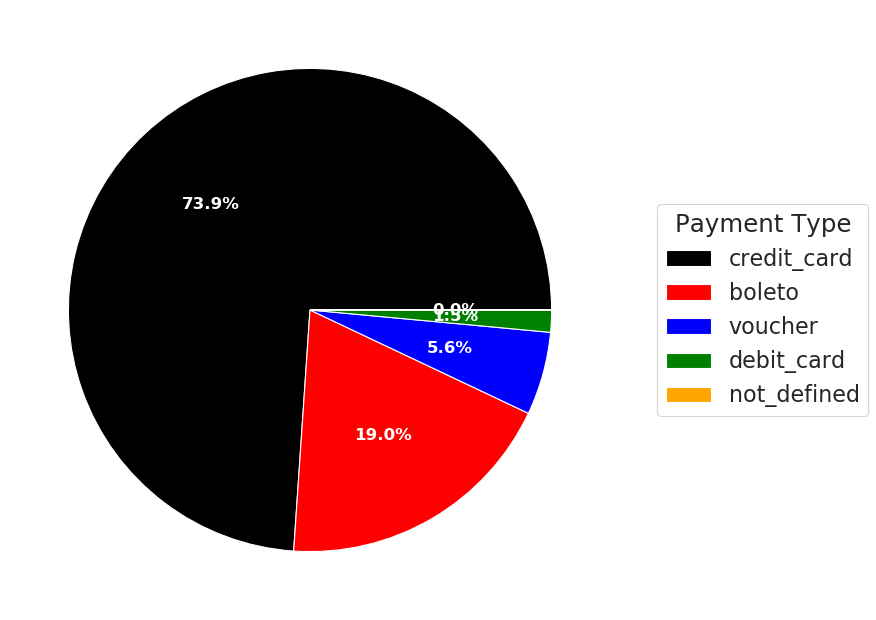

In [49]:
fig,ax = plt.subplots(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

def func(pct, allvals):
    """Cette fonction calcule le pourcentage d'une variable et la met à un format précis."""
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['black', 'red', 'blue', 'green', 'orange','fuchsia','olive','gold','brown']

wedges, texts, autotexts = ax.pie(order_payments['payment_type'].value_counts(),
                                   autopct=lambda pct: func(pct, order_payments['payment_type'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax.legend(wedges, order_payments['payment_type'].value_counts().index,
          title="Payment Type",
          title_fontsize=22,
          loc="center",
          fontsize = 20,
          bbox_to_anchor=(1.0, 0, 0.5, 1))

#ax.set_title('Composition of groups',fontsize=20)

plt.setp(autotexts, size=15, weight="bold")
plt.show()

In [50]:
data = orders[['order_id','order_purchase_timestamp']]

data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

data['order_day'] = data['order_purchase_timestamp'].apply(lambda x: x.day)
data['order_hour'] = data['order_purchase_timestamp'].apply(lambda x: x.hour)
data['order_weekday'] = data['order_purchase_timestamp'].apply(lambda x: x.isoweekday())
data['order_weekOfYear'] = data['order_purchase_timestamp'].apply(lambda x: x.isocalendar()[1])

data.head()

/home/famien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/famien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/famien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

order_id order_purchase_timestamp  order_day  \
0  e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33          2   
1  53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37         24   
2  47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49          8   
3  949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06         18   
4  ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39         13   

   order_hour  order_weekday  order_weekOfYear  
0          10              1                40  
1          20              2                30  
2           8              3                32  
3          19              6                46  
4          21              2                 7

In [51]:
data.dtypes

order_id                            object
order_purchase_timestamp    datetime64[ns]
order_day                            int64
order_hour                           int64
order_weekday                        int64
order_weekOfYear                     int64
dtype: object

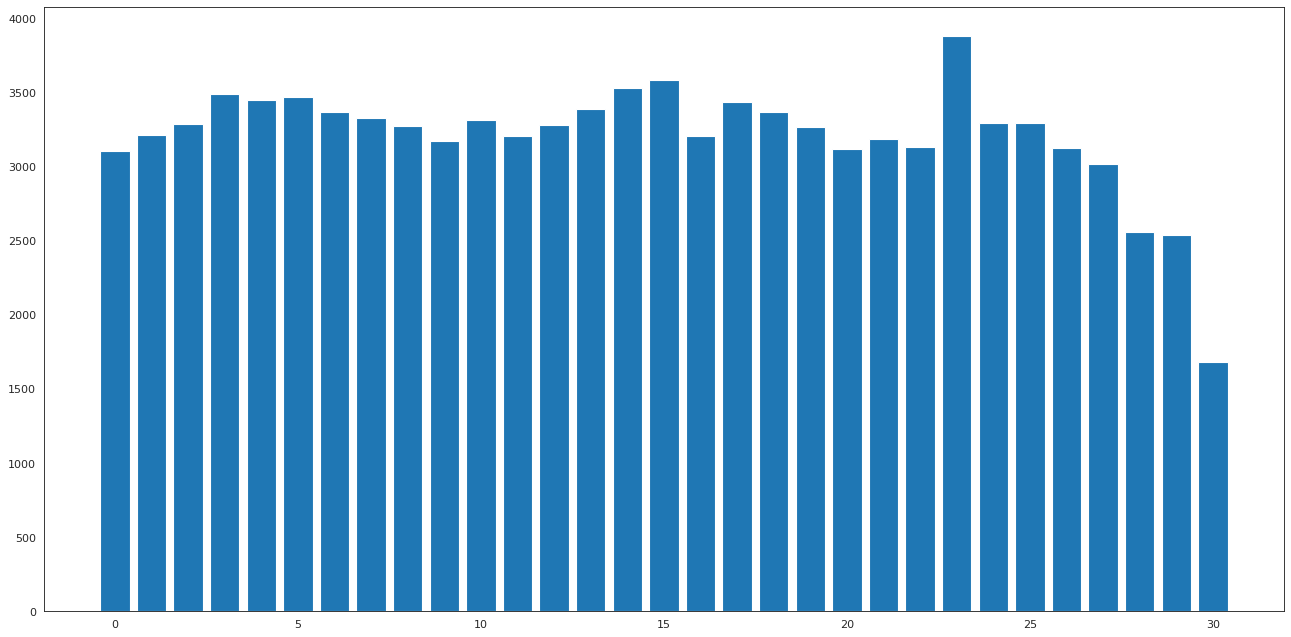

In [52]:
newdata0 = data[['order_id','order_day']].groupby('order_day').count()

fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

pos = np.arange(len(newdata0))

plt.bar(pos, newdata0['order_id'])
plt.show()

In [53]:
nbOrderPerMonth = data.groupby(data['order_purchase_timestamp'].dt.strftime('%Y-%m'))['order_id'].count()

dataBeginMonth = data.loc[data['order_day']<10]
nbOrderBeginMonth = dataBeginMonth.groupby(dataBeginMonth['order_purchase_timestamp'].dt.strftime(
    '%Y-%m'))['order_id'].count()

dataAfterMidMonth = data.loc[data['order_day']>15]
nbOrderAfterMidMonth = dataAfterMidMonth.groupby(dataAfterMidMonth['order_purchase_timestamp'].dt.strftime(
    '%Y-%m'))['order_id'].count()

ratioOfOrderPerMonth = pd.DataFrame({})

ratioOfOrderPerMonth['BeginMonth'] = nbOrderBeginMonth/nbOrderPerMonth * 100
ratioOfOrderPerMonth['AfterMidMonth'] = nbOrderAfterMidMonth/nbOrderPerMonth * 100

ratioOfOrderPerMonth['BeginMonth'].fillna(0,inplace=True)
ratioOfOrderPerMonth['AfterMidMonth'].fillna(0,inplace=True)

ratioOfOrderPerMonth.head(n=30)

BeginMonth  AfterMidMonth
order_purchase_timestamp                           
2016-09                    50.000000       0.000000
2016-10                    87.654321       0.308642
2016-12                     0.000000     100.000000
2017-01                     6.375000      84.250000
2017-02                    40.056180      37.752809
2017-03                    28.262491      51.565996
2017-04                    29.908486      53.702163
2017-05                    28.108108      53.000000
2017-06                    33.805855      45.146379
2017-07                    25.558867      53.452558
2017-08                    29.623644      50.865851
2017-09                    26.954492      48.658110
2017-10                    28.503563      52.558843
2017-11                    17.921527      67.749205
2017-12                    39.256126      37.352371
2018-01                    26.523593      52.194250
2018-02                    30.781807      48.840666
2018-03                    30.855637      50.298156
2018-04                    29.543162      51.707739
2018-05                    37.494544      38.411174
2018-06                    28.587644      48.873034
2018-07                    23.919263      62.523840
2018-08                    42.920762      33.476658
2018-09                    43.750000      31.250000
2018-10                    50.000000      50.000000

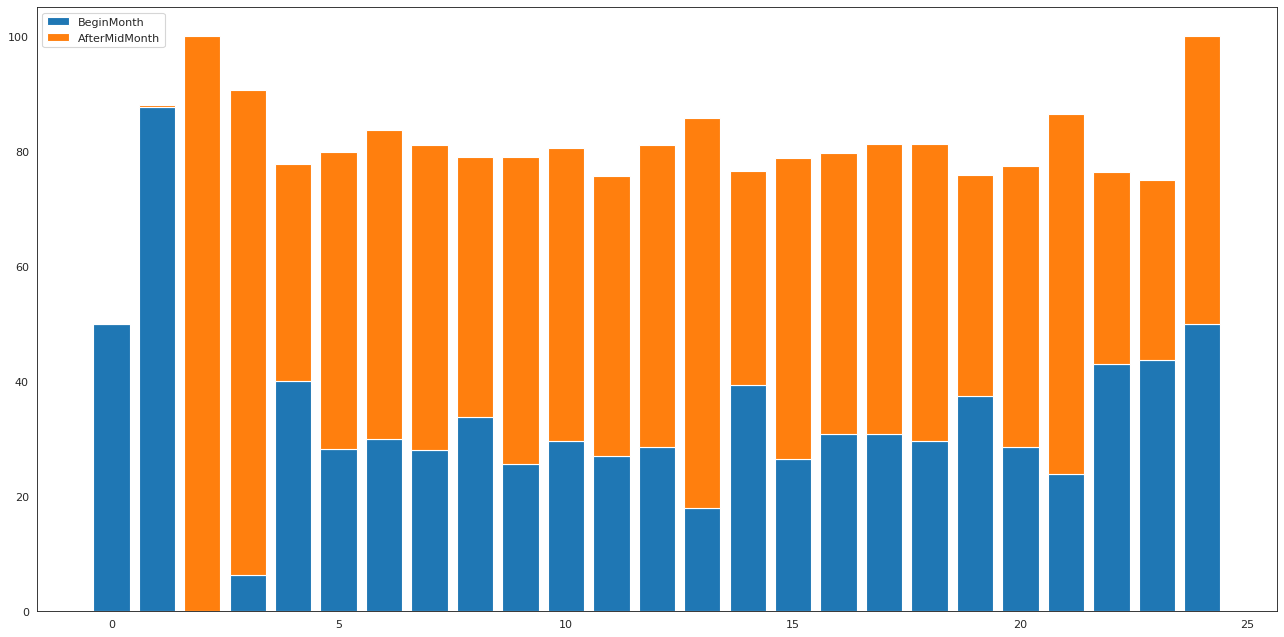

In [54]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

pos = np.arange(len(ratioOfOrderPerMonth['BeginMonth']))

b1 = plt.bar(pos,ratioOfOrderPerMonth['BeginMonth'])
b2 = plt.bar(pos,ratioOfOrderPerMonth['AfterMidMonth'],bottom=ratioOfOrderPerMonth['BeginMonth'])

plt.legend((b1[0], b2[0]), ('BeginMonth', 'AfterMidMonth'))
plt.show()

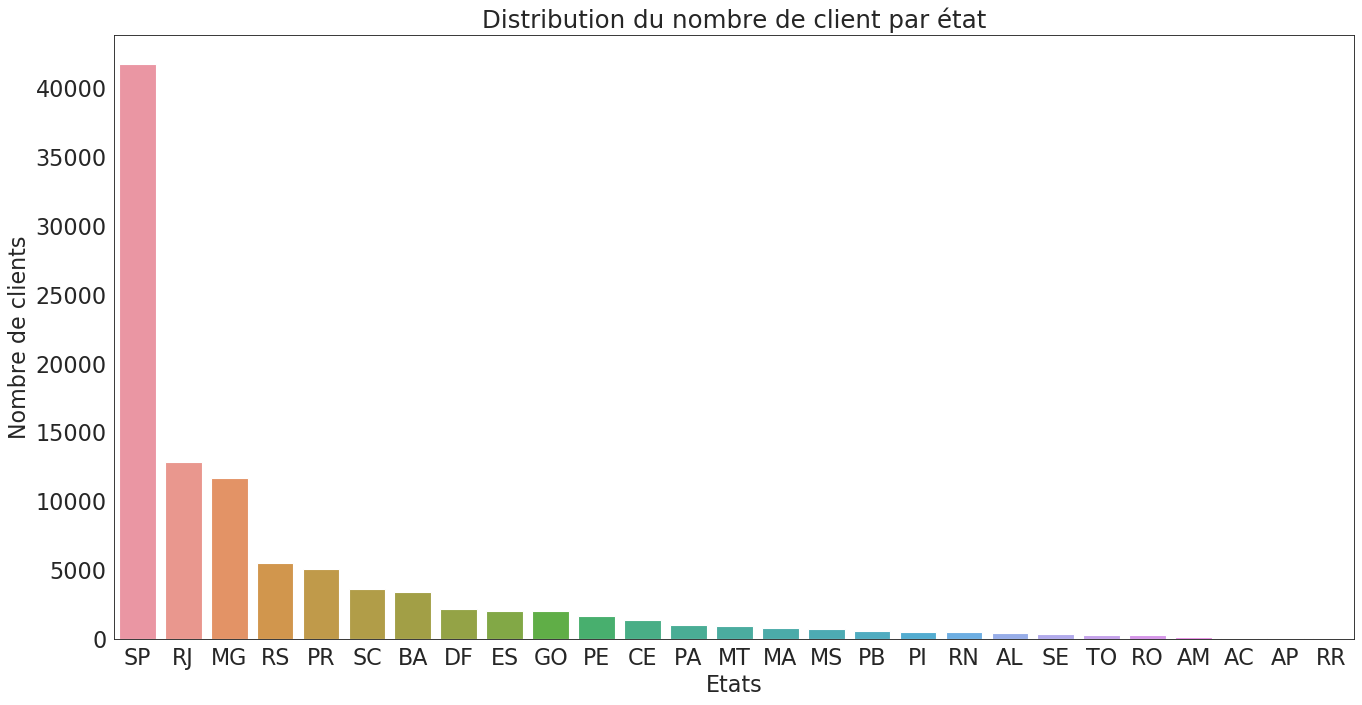

In [55]:
data = customers[['customer_state','customer_city']].groupby(
    ['customer_state']).count().sort_values(by='customer_city',ascending=False)

fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
g= sns.barplot(x=data.index,y=data['customer_city'])

plt.title("Distribution du nombre de client par état",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Etats",fontsize=20)
plt.ylabel("Nombre de clients",fontsize=20)

plt.show()

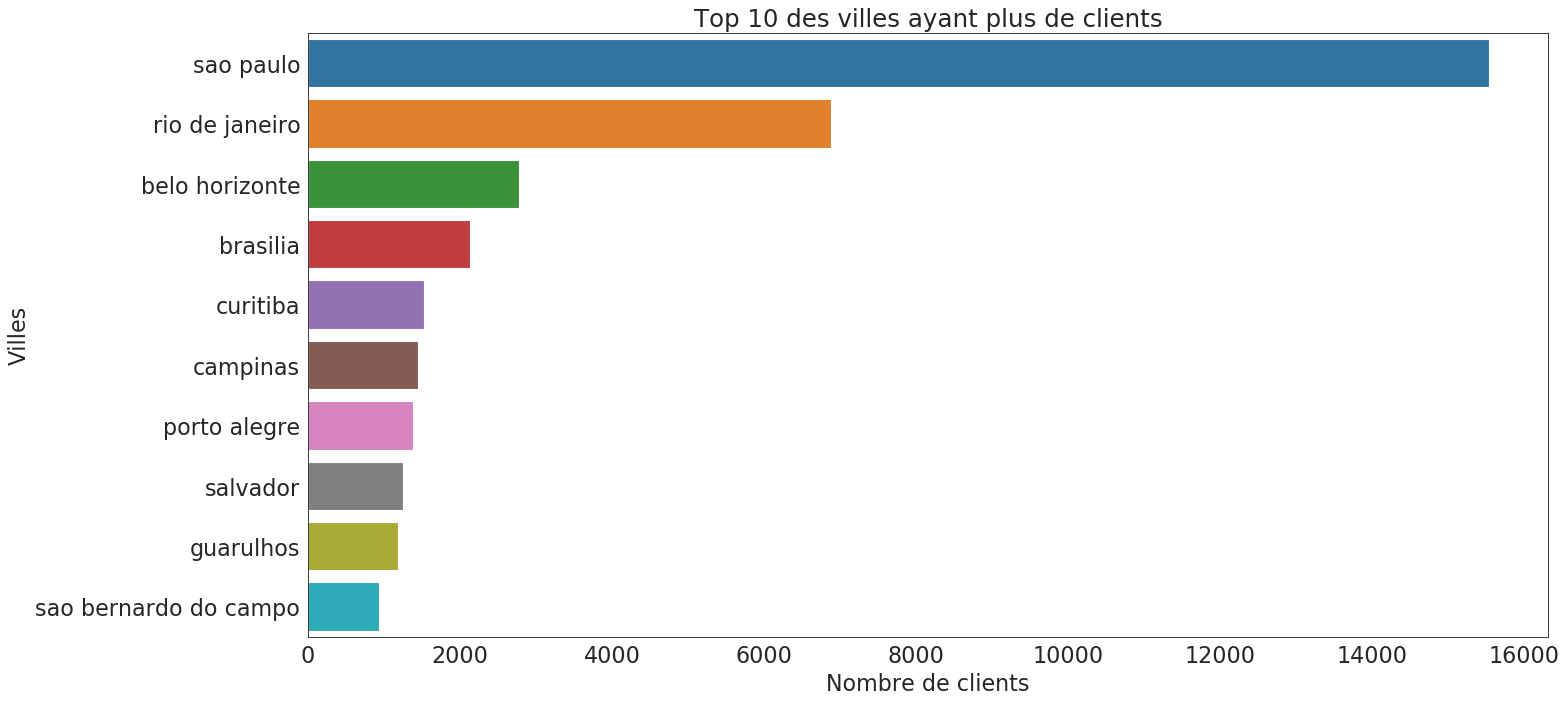

In [56]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

sampleSize = customers['customer_city'].value_counts().head(10)

g = sns.barplot(x=sampleSize, y=sampleSize.index,ax=ax)


plt.title("Top 10 des villes ayant plus de clients",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Villes",fontsize=20)
plt.xlabel("Nombre de clients",fontsize=20)

plt.show()

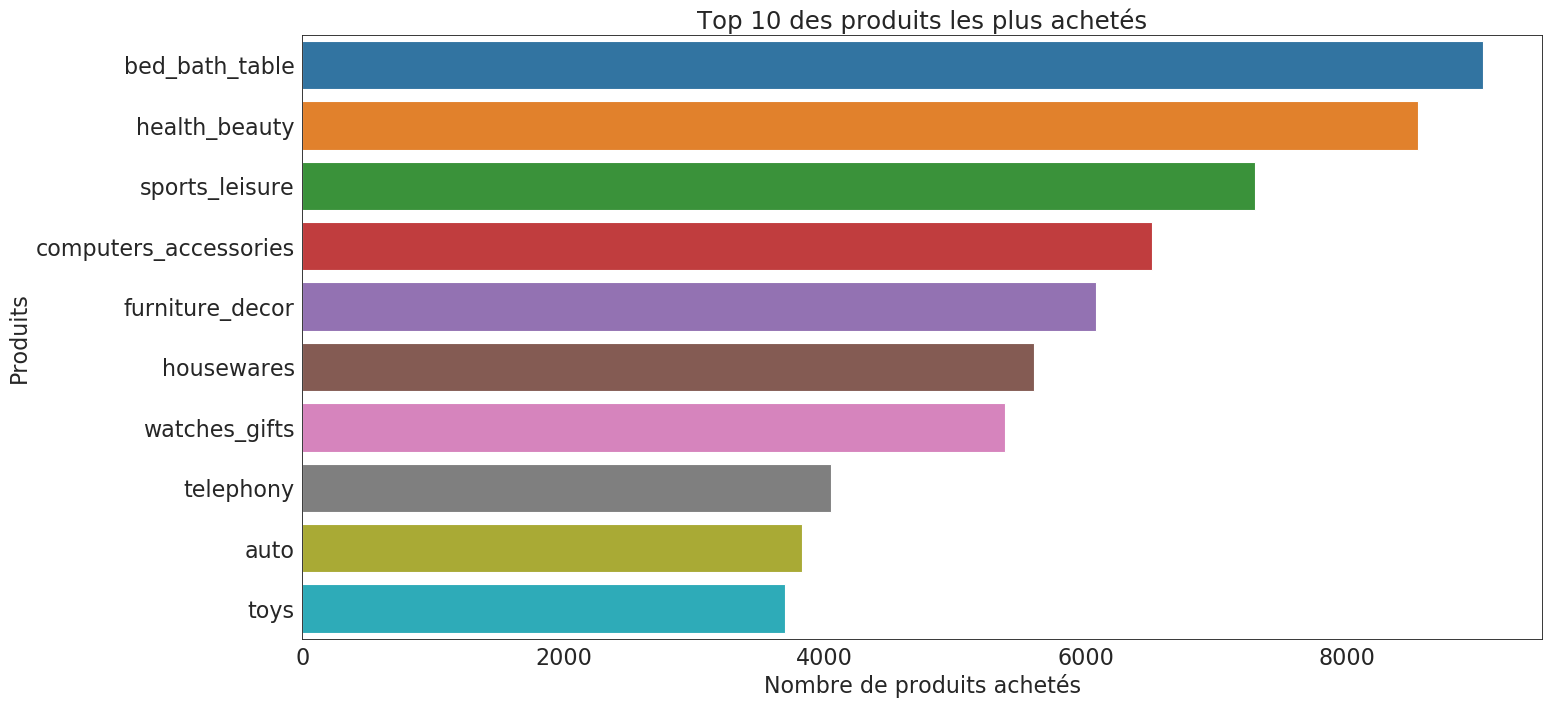

In [57]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

data00 = pd.merge(productCatName,pd.merge(products,pd.merge(orderItems,pd.merge(customers,orders))))

sampleSize = data00[['customer_unique_id','product_category_name_english']].dropna().groupby(
    'customer_unique_id').agg(lambda x: x.mode()[0])

sampleSize = sampleSize['product_category_name_english'].value_counts().head(10)

g = sns.barplot(x=sampleSize, y=sampleSize.index,ax=ax)

plt.title("Top 10 des produits les plus achetés",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Produits",fontsize=20)
plt.xlabel("Nombre de produits achetés",fontsize=20)

plt.show()

In [58]:
data00.head()

product_category_name product_category_name_english  \
0          beleza_saude                 health_beauty   
1          beleza_saude                 health_beauty   
2          beleza_saude                 health_beauty   
3          beleza_saude                 health_beauty   
4          beleza_saude                 health_beauty   

                         product_id  product_name_lenght  \
0  e3e020af31d4d89d2602272b315c3f6e                 58.0   
1  c5d8079278e912d7e3b6beb48ecb56e8                 60.0   
2  c5d8079278e912d7e3b6beb48ecb56e8                 60.0   
3  36555a2f528d7b2a255c504191445d39                 51.0   
4  e586ebb6022265ae1eea38f46ffe3ead                 40.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                      1987.0                 3.0              75.0   
1                       330.0                 1.0            1300.0   
2                       330.0                 1.0            1300.0   
3                      1069.0                 1.0            1467.0   
4                      1469.0                 3.0            1050.0   

   product_length_cm  product_height_cm  product_width_cm  ...  \
0               21.0                7.0              13.0  ...   
1               19.0               28.0              17.0  ...   
2               19.0               28.0              17.0  ...   
3               23.0               16.0              20.0  ...   
4               18.0               21.0              27.0  ...   

                 customer_unique_id  customer_zip_code_prefix  \
0  dc83fe8f72fb4388f079a2f9b586240c                      8599   
1  ba0a84d4272f023846c748fd2eb76ffd                     20261   
2  46e277a4bd2d4bf3e0e8cfaf4ea3c41b                     39401   
3  8ad15fb1cf056731335e36eb723c0eac                     98780   
4  463b274f7ab4cac3b894531a03a7afa1                     97105   

     customer_city customer_state  order_status  order_purchase_timestamp  \
0  itaquaquecetuba             SP     delivered       2017-05-12 10:51:43   
1   rio de janeiro             RJ     delivered       2018-03-06 18:14:49   
2    montes claros             MG     delivered       2017-07-31 18:47:11   
3       santa rosa             RS     delivered       2018-02-08 13:55:48   
4      santa maria             RS     delivered       2018-08-12 13:21:59   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-12 11:05:13          2017-05-16 09:14:33   
1  2018-03-06 18:30:16          2018-03-07 22:38:47   
2  2017-07-31 19:03:15          2017-08-02 17:49:51   
3  2018-02-08 14:40:26          2018-02-08 23:08:10   
4  2018-08-12 13:35:14          2018-08-13 17:57:00   

   order_delivered_customer_date order_estimated_delivery_date  
0            2017-05-19 14:13:02           2017-06-05 00:00:00  
1            2018-03-14 14:38:53           2018-04-12 00:00:00  
2            2017-08-10 20:04:29           2017-08-30 00:00:00  
3            2018-02-21 14:35:19           2018-03-16 00:00:00  
4            2018-08-21 21:16:33           2018-09-12 00:00:00  

[5 rows x 27 columns]

order_id


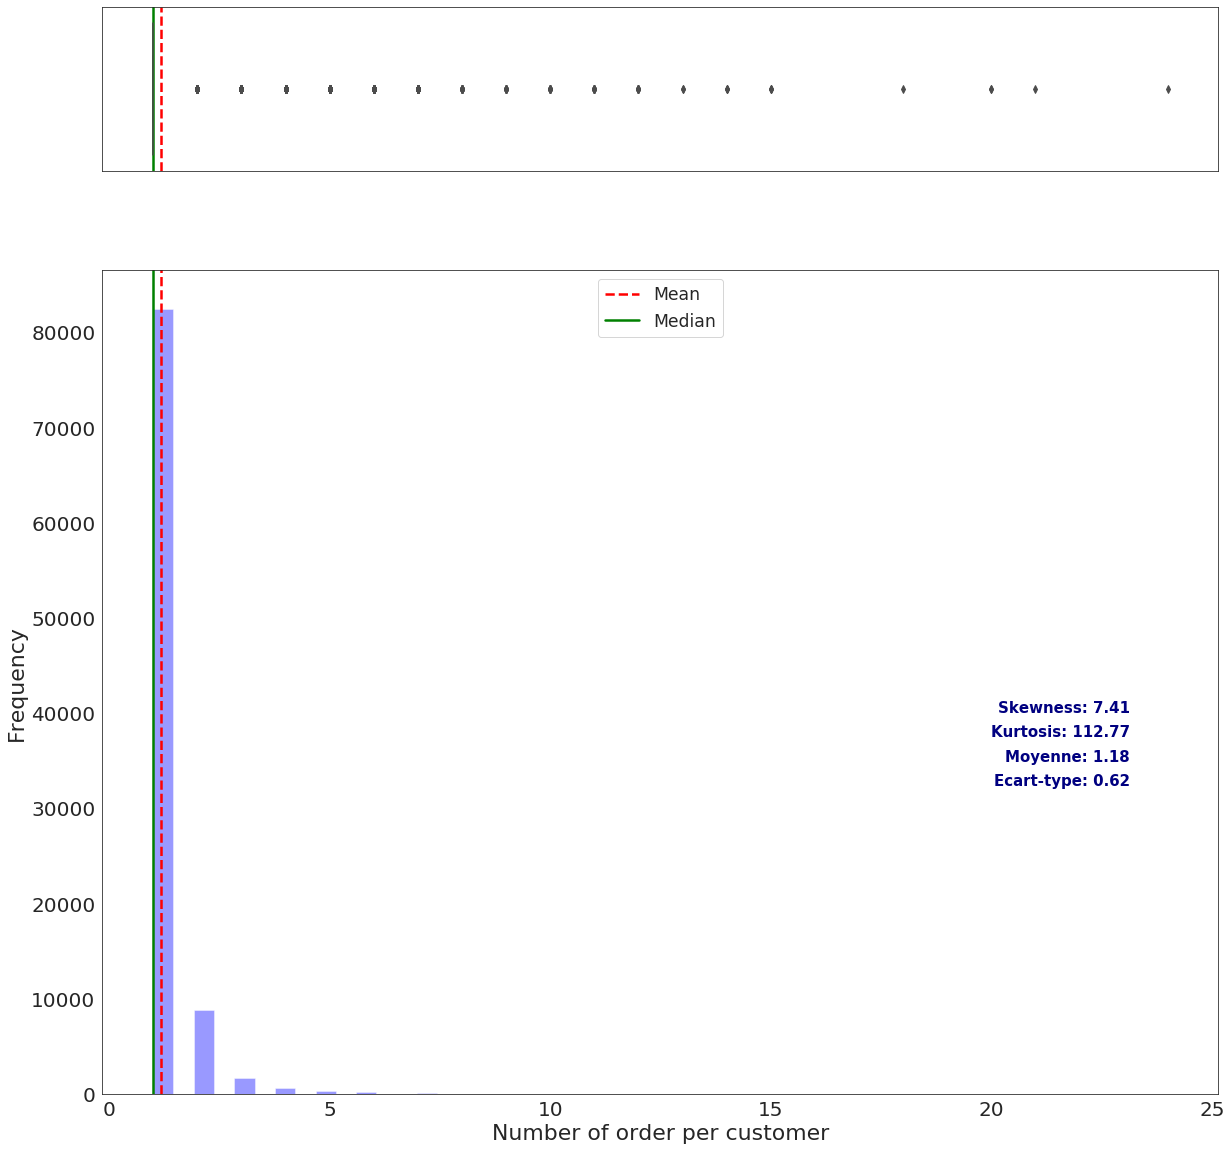

In [59]:
newData = data00[['customer_unique_id','order_id']].groupby('customer_unique_id').count()

for cols in newData.columns:
    print(cols)
    dataMean = newData[cols].dropna().mean()
    dataMedian = newData[cols].dropna().median()
    
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    
    sns.boxplot(newData[cols].dropna(),color="blue",ax=ax_box)
    ax_box.axvline(float(dataMean),color='r', linestyle='--',linewidth=2.5)
    ax_box.axvline(float(dataMedian), color='g', linestyle='-',linewidth=2.5)
    ax_box.set_xlabel("")
    ax_box.set_ylabel("")

    xx = 0.75
    location = 'upper center'
        
    sns.distplot(newData[cols].dropna(),kde=False,color="blue",ax=ax_hist)
    ax_hist.text(x=xx, y=0.58, transform=ax.transAxes, s="Skewness: %.2f" % newData[cols].dropna().skew(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
    ax_hist.text(x=xx, y=0.54, transform=ax.transAxes, s="Kurtosis: %.2f" % newData[cols].dropna().kurt(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
    ax_hist.text(x=xx, y=0.50, transform=ax.transAxes, s="Moyenne: %.2f" % newData[cols].dropna().mean(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
    ax_hist.text(x=xx, y=0.46, transform=ax.transAxes, s="Ecart-type: %.2f" % newData[cols].dropna().std(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
    
    yMinMax = ax_hist.get_ylim()
    
    ax_hist.axvline(float(dataMean),yMinMax[0],yMinMax[1],color='r', linestyle='--',linewidth=2.5)
    ax_hist.axvline(float(dataMedian),yMinMax[0],yMinMax[1], color='g', linestyle='-',linewidth=2.5)
        
    plt.legend({'Mean':float(dataMean),'Median':float(dataMedian)},loc=location,fontsize='xx-large')
    plt.xlabel('Number of order per customer',fontsize=22)
    plt.ylabel('Frequency',fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.show()

In [60]:
newData.head()

order_id
customer_unique_id                        
0000366f3b9a7992bf8c76cfdf3221e2         1
0000b849f77a49e4a4ce2b2a4ca5be3f         1
0000f46a3911fa3c0805444483337064         1
0000f6ccb0745a6a4b88665a16c9f078         1
0004aac84e0df4da2b147fca70cf8255         1

In [61]:
newData.min()

order_id    1
dtype: int64

In [62]:
newData.max()

order_id    24
dtype: int64

In [63]:
import folium

data = geolocation.iloc[0:10000,]
m = folium.Map()
m = folium.Map(location=[data['geolocation_lat'].mean(), data['geolocation_lng'].mean()],zoom_start=12)
#data.apply(lambda ligne:folium.Marker(location=[ligne['geolocation_lat'],
#                                                       ligne['geolocation_lng']]).add_to(m),axis=1)
for i in range(0,len(data)):
    #print(data.iloc[i]['geolocation_lat'],data.iloc[i]['geolocation_lng'])
    folium.Circle([data.iloc[i]['geolocation_lat'],data.iloc[i]['geolocation_lng']],radius=1).add_to(m)
m

## 2. Création de variables et nettoyage des données

In [64]:
new_orders = pd.merge(orders,
                      pd.merge(order_items,
                               pd.merge(order_payments,order_reviews,how='left',on='order_id'),
                               how='left',on='order_id'),how='left',on='order_id')

new_location = pd.merge(customers,geolocation,
                how='left',left_on='customer_zip_code_prefix',
                right_on='geolocation_zip_code_prefix').groupby('customer_unique_id').mean()[['geolocation_lat', 'geolocation_lng']].reset_index()


new_orders = pd.merge(sellers,pd.merge(new_orders,
                                       pd.merge(customers,new_location,how='left',on='customer_unique_id'),
                                       how='left',on='customer_id'),how='right',on='seller_id')

new_orders = pd.merge(new_orders,
                     pd.merge(products,product_category_name,how='left',on='product_category_name'),
                     how='left',on='product_id').drop('product_category_name',axis=1)

new_orders['delivery_days'] =(pd.to_datetime(new_orders['order_delivered_customer_date']) - pd.to_datetime(new_orders['order_purchase_timestamp'])).apply(lambda x:x.days+1)
new_orders.head()

seller_id  seller_zip_code_prefix seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                 13023.0    campinas   
1  3442f8959a84dea7ee197c632cb2df15                 13023.0    campinas   
2  3442f8959a84dea7ee197c632cb2df15                 13023.0    campinas   
3  d1b65fc7debc3361ea86b5f14c68d2e2                 13844.0  mogi guacu   
4  d1b65fc7debc3361ea86b5f14c68d2e2                 13844.0  mogi guacu   

  seller_state                          order_id  \
0           SP  6d953888a914b67350d5bc4d48f2acab   
1           SP  bc8a5de6abf5b14f98a6135a7fb46731   
2           SP  4a90af3e85dd563884e2afeab1091394   
3           SP  1887b26eba419ce20f6fe34a6f88e80a   
4           SP  83f24bbc4f76a2730ba9c9cfa32e6d07   

                        customer_id order_status order_purchase_timestamp  \
0  a973c4e3ad82777add3fa188f91dacea    delivered      2017-05-05 16:12:29   
1  1554ffe702931a062b4383b109accf63    delivered      2017-08-30 11:47:52   
2  9d6837f9700a3441e7183bff3bc4eef0    delivered      2017-08-21 20:35:44   
3  23fe51c9d4d1b1cef50c57b3c0babf5e    delivered      2017-04-28 14:20:07   
4  d49bac4ac7d77b956f2b185ab700fbf1    delivered      2017-04-27 09:09:44   

     order_approved_at order_delivered_carrier_date  ... geolocation_lng  \
0  2017-05-05 16:25:11          2017-05-12 05:43:55  ...      -44.037409   
1  2017-08-30 12:50:19          2017-08-30 19:22:18  ...      -46.451226   
2  2017-08-21 20:50:19          2017-08-29 20:33:29  ...      -46.684210   
3  2017-04-28 14:35:15          2017-05-02 13:39:21  ...      -45.453007   
4  2017-04-27 09:25:08          2017-04-27 13:47:44  ...      -43.200156   

  product_name_lenght  product_description_lenght product_photos_qty  \
0                27.0                       485.0                2.0   
1                44.0                      1089.0                1.0   
2                26.0                       417.0                3.0   
3                26.0                       998.0                7.0   
4                26.0                       998.0                7.0   

  product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0            600.0               35.0               15.0              28.0   
1            300.0               16.0                5.0              15.0   
2            700.0               43.0               15.0              35.0   
3           3500.0               40.0               55.0              25.0   
4           3500.0               40.0               55.0              25.0   

  product_category_name_english  delivery_days  
0                sports_leisure           29.0  
1                sports_leisure            3.0  
2                sports_leisure            9.0  
3           luggage_accessories           12.0  
4           luggage_accessories            8.0  

[5 rows x 42 columns]

In [65]:
new_orders.shape

(119093, 42)

In [66]:
new_orders['order_purchase_timestamp'] = pd.to_datetime(new_orders['order_purchase_timestamp'])

In [67]:
data1 = new_orders[(new_orders['order_purchase_timestamp'] >= '2016-09-04 00:00:00') & (
    new_orders['order_purchase_timestamp'] <= '2017-08-31 23:59:59')]
data2 = new_orders[(new_orders['order_purchase_timestamp'] >= '2017-09-01 00:00:00') & (
    new_orders['order_purchase_timestamp'] <= '2018-08-31 23:59:59')]

In [68]:
data1.dtypes

seller_id                                object
seller_zip_code_prefix                  float64
seller_city                              object
seller_state                             object
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
order_item_id                           float64
product_id                               object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           

In [69]:
data1['customer_id'].nunique()

23297

In [70]:
data1['customer_unique_id'].nunique()

22643

In [71]:
data1.shape

(28224, 42)

In [72]:
import datetime
from dateutil.relativedelta import relativedelta

date_ref = '2017-08-01 00:00:00'
dateTime_obj = datetime.datetime.strptime(date_ref, '%Y-%m-%d %H:%M:%S')

stride=[3]

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

for i in stride:
    start_date = dateTime_obj - relativedelta(months=i)
    end_date = start_date + relativedelta(months=1)
    print(start_date,' - ',end_date)
    #print(orders['order_purchase_timestamp'].dtypes)
    testData = orders[(orders['order_purchase_timestamp'] >= start_date) & 
        (orders['order_purchase_timestamp'] < end_date)]
    
testData.head(n=90)

2017-05-01 00:00:00  -  2017-06-01 00:00:00


order_id                       customer_id  \
7     6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
10    e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
40    1e7aff52cdbb2451ace09d0f848c3699  ddaff536587109b89777e0353215e150   
45    6ebaec694d7025e2ad4a05dba887c032  4f28355e5c17a4a42d3ce2439a1d4501   
46    d17dc4a904426827ca80f2ccb3a6be56  569cf68214806a39acc0f39344aea67f   
...                                ...                               ...   
2161  7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
2180  27d38402a9bf35d21de2f99946b1c1ae  887161ac86a185362955d1b9383647ff   
2183  cab041d8d606d6c9d3165da578795340  888d2ebe1af2a8c93c75dae5dfc23719   
2208  e4aac63ea6f6b75b6d91ead05207fb43  9aa2c4bac83761140a8703ebdf9e49bd   
2239  a7dbcf5043158d6fa72859eead2f3d10  b4555c86f2cac80eb9a05546896ac079   

     order_status order_purchase_timestamp    order_approved_at  \
7       delivered      2017-05-16 13:10:30  2017-05-16 13:22:11   
10      delivered      2017-05-16 19:41:10  2017-05-16 19:50:18   
40      delivered      2017-05-19 18:53:40  2017-05-19 19:05:17   
45      delivered      2017-05-18 13:55:47  2017-05-18 14:05:17   
46      delivered      2017-05-14 20:28:25  2017-05-14 20:42:45   
...           ...                      ...                  ...   
2161     canceled      2017-05-01 16:12:39                  NaN   
2180    delivered      2017-05-06 02:54:13  2017-05-06 03:10:09   
2183    delivered      2017-05-13 13:16:20  2017-05-13 13:25:17   
2208    delivered      2017-05-25 12:51:37  2017-05-25 13:05:42   
2239    delivered      2017-05-16 12:28:32  2017-05-16 13:10:13   

     order_delivered_carrier_date order_delivered_customer_date  \
7             2017-05-22 10:07:46           2017-05-26 12:55:51   
10            2017-05-18 11:40:40           2017-05-29 11:18:31   
40            2017-05-22 10:16:07           2017-05-31 13:58:46   
45            2017-05-19 12:01:38           2017-05-29 12:47:20   
46            2017-05-16 08:17:46           2017-05-25 09:14:31   
...                           ...                           ...   
2161                          NaN                           NaN   
2180          2017-05-10 13:36:19           2017-05-17 12:52:58   
2183          2017-05-16 04:41:47           2017-06-02 14:28:53   
2208          2017-05-31 11:35:26           2017-06-02 09:44:29   
2239          2017-05-17 13:53:58           2017-05-23 11:53:40   

     order_estimated_delivery_date  
7              2017-06-07 00:00:00  
10             2017-06-07 00:00:00  
40             2017-06-12 00:00:00  
45             2017-06-09 00:00:00  
46             2017-06-12 00:00:00  
...                            ...  
2161           2017-05-30 00:00:00  
2180           2017-05-29 00:00:00  
2183           2017-06-19 00:00:00  
2208           2017-06-07 00:00:00  
2239           2017-06-16 00:00:00  

[90 rows x 8 columns]

In [73]:
import datetime
from dateutil.relativedelta import relativedelta

def compute_pastMonth_metrics(data,date_ref):
    """Cette fonction selection des données sur un intervalle de temps et calcule des variables."""

    dateTime_obj = datetime.datetime.strptime(date_ref, '%Y-%m-%d %H:%M:%S')
    
    dat = pd.DataFrame(index = data['customer_unique_id'].unique())
    dat.index.name = 'customer_unique_id'

    data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
    
    stride = [3,6,9]
    for i in stride:
        start_date = dateTime_obj - relativedelta(months=i)
        end_date = start_date + relativedelta(months=3)
        newData = data[(data['order_purchase_timestamp'] >= start_date) & 
                       (data['order_purchase_timestamp'] < end_date)]
        
        s0 = 'total_number_of_orders (M-'+str(i)+')'
        dat[s0] = newData[['customer_unique_id','order_id']].groupby('customer_unique_id').count()
        
        s1 = 'total_cost_of_orders (M-'+str(i)+')'
        dat[s1] = newData[['customer_unique_id','order_id','price']].groupby(
            ['customer_unique_id','order_id']).sum().groupby(['customer_unique_id']).sum()

        s2 = 'max_order_price (M-'+str(i)+')'
        dat[s2] = newData[['customer_unique_id', 'order_id','price']].groupby(
            ['customer_unique_id','order_id'])['price'].max().groupby(['customer_unique_id']).max()

        s3 = 'mean_order_price (M-'+str(i)+')'
        dat[s3] = newData[['customer_unique_id', 'order_id','price']].groupby(
            ['customer_unique_id','order_id'])['price'].mean().groupby(['customer_unique_id']).mean()

    return dat

In [74]:
new_data = pd.DataFrame(index = data1['customer_unique_id'].unique())
new_data.index.name = 'customer_unique_id'

tampData = data1[['customer_unique_id','customer_city']].groupby(
    'customer_unique_id').agg(lambda x:x.value_counts().index[0])
new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

tampData = data1[['customer_unique_id','customer_state']].groupby(
    'customer_unique_id').agg(lambda x:x.value_counts().index[0])
new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

## Date du dernier achat
tampData = data1[['customer_unique_id','order_purchase_timestamp']].groupby('customer_unique_id').max()
tampData.rename(columns={'order_purchase_timestamp':'last_order'},inplace=True)
tampData['last_order_day'] = pd.to_datetime(tampData['last_order']).apply(lambda x: x.day)
tampData['last_order_hour'] = pd.to_datetime(tampData['last_order']).apply(lambda x: x.hour)
tampData['last_order_weekday'] = pd.to_datetime(tampData['last_order']).apply(lambda x: x.isoweekday())
tampData['last_order_weekOfYear'] = pd.to_datetime(tampData['last_order']).apply(lambda x: x.isocalendar()[1])
## Ajouter jour du mois, la semaine de l'année

new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

## Nombre d'achat par client
tampData = data1[['customer_unique_id','order_id']].groupby('customer_unique_id').count()
tampData.rename(columns={'order_id':'total_number_of_orders'},inplace=True)

new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

## Produit le plus acheté
tampData = data1[['customer_unique_id','product_category_name_english']].dropna().groupby(
    'customer_unique_id').agg(lambda x: x.mode()[0])
tampData.rename(columns={'product_category_name_english':'most_purchased_product'},inplace=True)

new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

## Note moyenne des commentaires
tampData = data1[['customer_unique_id','review_score']].groupby('customer_unique_id')['review_score'].mean()
tampData.rename('mean_review_score',inplace=True)

new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

## Montant total des achats par client
tampData = data1[['customer_unique_id',
                       'order_id','price']].groupby(['customer_unique_id', 
                                                     'order_id']).sum().groupby(['customer_unique_id']).sum()
tampData.rename(columns={'price':'total_cost_of_orders'},inplace=True)

new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

## Montant maximum des achats par client
tampData = data1[['customer_unique_id', 'order_id','price']].groupby(
    ['customer_unique_id','order_id'])['price'].max().groupby(['customer_unique_id']).max()
tampData.rename('max_order_price',inplace=True)

new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

## Achat moyen du client sur la période
tampData = data1[['customer_unique_id', 'order_id','price']].groupby(
    ['customer_unique_id','order_id'])['price'].mean().groupby(['customer_unique_id']).mean()
tampData.rename('mean_order_price',inplace=True)

new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

## Comportement du client des 3,6,9 derniers mois par rapport à Août 2017
date_ref = '2017-08-01 00:00:00'
tampData = compute_pastMonth_metrics(data1,date_ref)

new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

## Délai moyen de livraison
tampData = data1[['customer_unique_id','delivery_days']].groupby(['customer_unique_id']).mean()
tampData.rename(columns={'delivery_days':'mean_delivery_days'},inplace=True)

new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

## Moyen de paiement le plus utilisé
tampData = data1[['customer_unique_id','payment_type']].dropna().groupby(
    'customer_unique_id').agg(lambda x: x.mode()[0])

new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

## Facilité de paiement moyen
tampData = data1[['customer_unique_id','payment_installments']].groupby('customer_unique_id').mean()

new_data = pd.merge(new_data,tampData,how = 'left',left_index=True,right_index=True)

pd.options.display.max_columns =30
new_data.head()

/home/famien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


customer_city customer_state  \
customer_unique_id                                                
b4527423469300ee354458e1b5f961be        contagem             MG   
af0f26435fade1ca984d9affda307199            maua             SP   
f421a2a66b69dbfe6db0c87845281a90       sao paulo             SP   
00ac9cd5c4ad19e16e7c6f6864711737         itajuba             MG   
51dc56123336c573f2977f5da81b17b9  rio de janeiro             RJ   

                                          last_order  last_order_day  \
customer_unique_id                                                     
b4527423469300ee354458e1b5f961be 2017-05-05 16:12:29               5   
af0f26435fade1ca984d9affda307199 2017-08-30 11:47:52              30   
f421a2a66b69dbfe6db0c87845281a90 2017-08-21 20:35:44              21   
00ac9cd5c4ad19e16e7c6f6864711737 2017-04-28 14:20:07              28   
51dc56123336c573f2977f5da81b17b9 2017-04-27 09:09:44              27   

                                  last_order_hour  last_order_weekday  \
customer_unique_id                                                      
b4527423469300ee354458e1b5f961be               16                   5   
af0f26435fade1ca984d9affda307199               11                   3   
f421a2a66b69dbfe6db0c87845281a90               20                   1   
00ac9cd5c4ad19e16e7c6f6864711737               14                   5   
51dc56123336c573f2977f5da81b17b9                9                   4   

                                  last_order_weekOfYear  \
customer_unique_id                                        
b4527423469300ee354458e1b5f961be                     18   
af0f26435fade1ca984d9affda307199                     35   
f421a2a66b69dbfe6db0c87845281a90                     34   
00ac9cd5c4ad19e16e7c6f6864711737                     17   
51dc56123336c573f2977f5da81b17b9                     17   

                                  total_number_of_orders  \
customer_unique_id                                         
b4527423469300ee354458e1b5f961be                       1   
af0f26435fade1ca984d9affda307199                       2   
f421a2a66b69dbfe6db0c87845281a90                       1   
00ac9cd5c4ad19e16e7c6f6864711737                       1   
51dc56123336c573f2977f5da81b17b9                       1   

                                 most_purchased_product  mean_review_score  \
customer_unique_id                                                           
b4527423469300ee354458e1b5f961be         sports_leisure                1.0   
af0f26435fade1ca984d9affda307199       office_furniture                3.0   
f421a2a66b69dbfe6db0c87845281a90         sports_leisure                5.0   
00ac9cd5c4ad19e16e7c6f6864711737    luggage_accessories                5.0   
51dc56123336c573f2977f5da81b17b9    luggage_accessories                5.0   

                                  total_cost_of_orders  max_order_price  \
customer_unique_id                                                        
b4527423469300ee354458e1b5f961be                 101.7            101.7   
af0f26435fade1ca984d9affda307199                 129.7            118.9   
f421a2a66b69dbfe6db0c87845281a90                 106.2            106.2   
00ac9cd5c4ad19e16e7c6f6864711737                 209.9            209.9   
51dc56123336c573f2977f5da81b17b9                 209.9            209.9   

                                  mean_order_price  \
customer_unique_id                                   
b4527423469300ee354458e1b5f961be            101.70   
af0f26435fade1ca984d9affda307199             64.85   
f421a2a66b69dbfe6db0c87845281a90            106.20   
00ac9cd5c4ad19e16e7c6f6864711737            209.90   
51dc56123336c573f2977f5da81b17b9            209.90   

                                  total_number_of_orders (M-3)  \
customer_unique_id                                               
b4527423469300ee354458e1b5f961be                           1.0   
af0f26435fade1ca984d9affda307199                           NaN 

In [75]:
new_data.shape

(22643, 28)

In [76]:
new_data.dtypes

customer_city                           object
customer_state                          object
last_order                      datetime64[ns]
last_order_day                           int64
last_order_hour                          int64
last_order_weekday                       int64
last_order_weekOfYear                    int64
total_number_of_orders                   int64
most_purchased_product                  object
mean_review_score                      float64
total_cost_of_orders                   float64
max_order_price                        float64
mean_order_price                       float64
total_number_of_orders (M-3)           float64
total_cost_of_orders (M-3)             float64
max_order_price (M-3)                  float64
mean_order_price (M-3)                 float64
total_number_of_orders (M-6)           float64
total_cost_of_orders (M-6)             float64
max_order_price (M-6)                  float64
mean_order_price (M-6)                 float64
total_number_

In [77]:
new_data.isna().sum()

customer_city                       0
customer_state                      0
last_order                          0
last_order_day                      0
last_order_hour                     0
last_order_weekday                  0
last_order_weekOfYear               0
total_number_of_orders              0
most_purchased_product            692
mean_review_score                 276
total_cost_of_orders                0
max_order_price                   275
mean_order_price                  275
total_number_of_orders (M-3)    11944
total_cost_of_orders (M-3)      11944
max_order_price (M-3)           12057
mean_order_price (M-3)          12057
total_number_of_orders (M-6)    15896
total_cost_of_orders (M-6)      15896
max_order_price (M-6)           15997
mean_order_price (M-6)          15997
total_number_of_orders (M-9)    21878
total_cost_of_orders (M-9)      21878
max_order_price (M-9)           21888
mean_order_price (M-9)          21888
mean_delivery_days                974
payment_type

### Traitement des valeurs manquantes

In [78]:
new_data['total_number_of_orders (M-3)'].fillna(0, inplace=True)
new_data['total_cost_of_orders (M-3)'].fillna(0, inplace=True)
new_data['max_order_price (M-3)'].fillna(0, inplace=True)
new_data['mean_order_price (M-3)'].fillna(0, inplace=True)
new_data['total_number_of_orders (M-6)'].fillna(0, inplace=True)
new_data['total_cost_of_orders (M-6)'].fillna(0, inplace=True)
new_data['max_order_price (M-6)'].fillna(0, inplace=True)
new_data['mean_order_price (M-6)'].fillna(0, inplace=True)
new_data['total_number_of_orders (M-9)'].fillna(0, inplace=True)
new_data['total_cost_of_orders (M-9)'].fillna(0, inplace=True)
new_data['max_order_price (M-9)'].fillna(0, inplace=True)
new_data['mean_order_price (M-9)'].fillna(0, inplace=True)


new_data['most_purchased_product'].fillna('unknown_product',inplace=True)

new_data.dropna(subset=['mean_review_score'],inplace=True)
new_data.isna().sum()

customer_city                     0
customer_state                    0
last_order                        0
last_order_day                    0
last_order_hour                   0
last_order_weekday                0
last_order_weekOfYear             0
total_number_of_orders            0
most_purchased_product            0
mean_review_score                 0
total_cost_of_orders              0
max_order_price                   0
mean_order_price                  0
total_number_of_orders (M-3)      0
total_cost_of_orders (M-3)        0
max_order_price (M-3)             0
mean_order_price (M-3)            0
total_number_of_orders (M-6)      0
total_cost_of_orders (M-6)        0
max_order_price (M-6)             0
mean_order_price (M-6)            0
total_number_of_orders (M-9)      0
total_cost_of_orders (M-9)        0
max_order_price (M-9)             0
mean_order_price (M-9)            0
mean_delivery_days              699
payment_type                      0
payment_installments        

mean_delivery_days


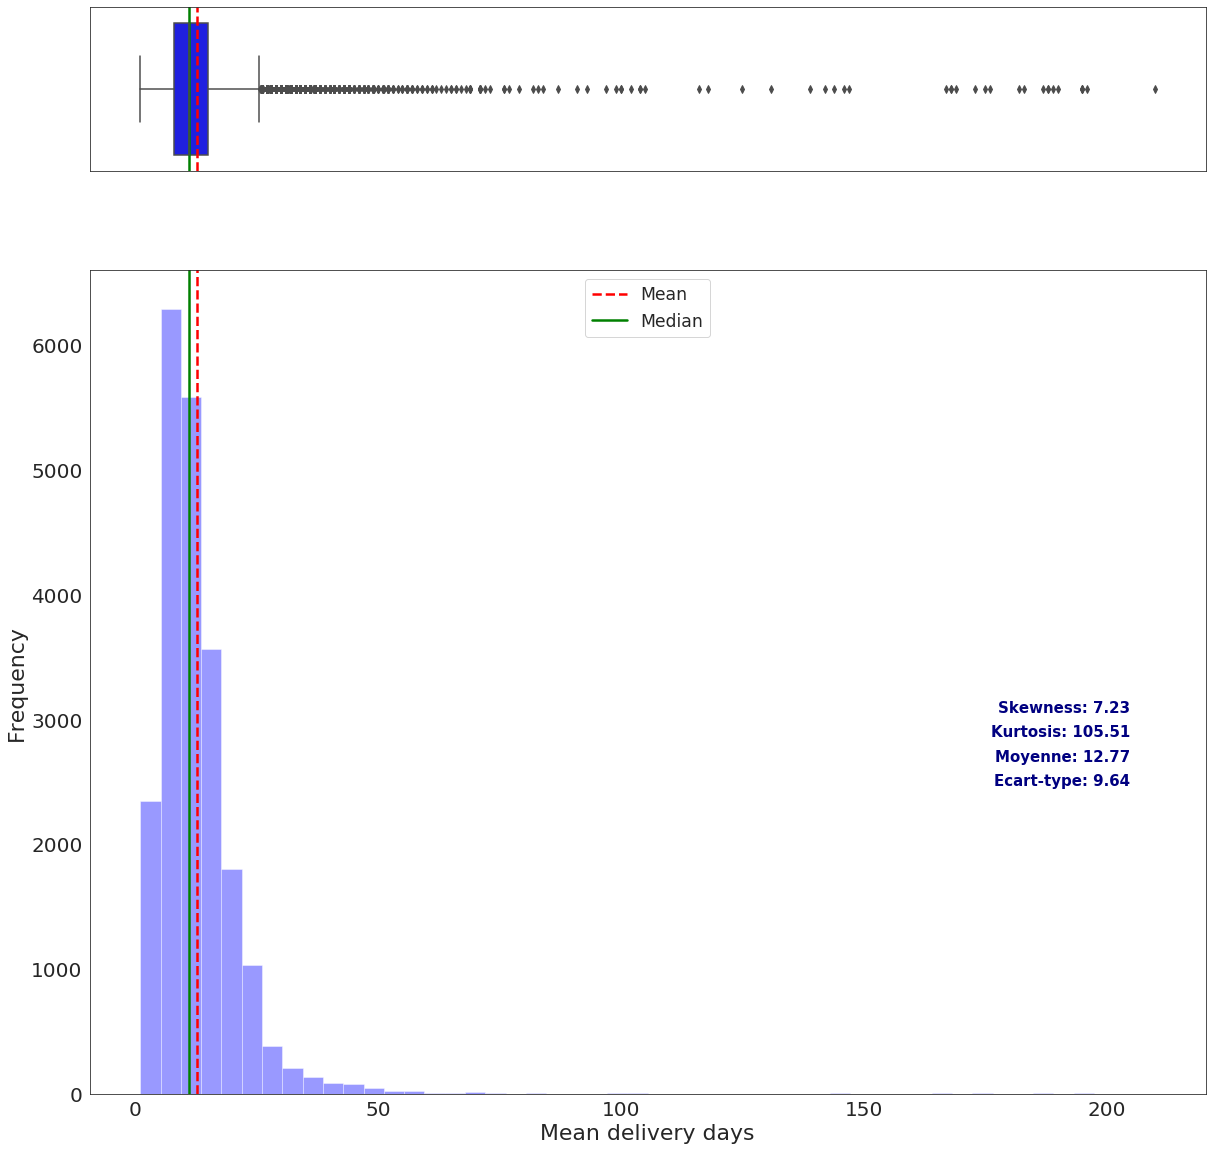

In [79]:
newData = new_data[['mean_delivery_days']]

for cols in newData.columns:
    print(cols)
    dataMean = newData[cols].dropna().mean()
    dataMedian = newData[cols].dropna().median()
    
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    
    sns.boxplot(newData[cols].dropna(),color="blue",ax=ax_box)
    ax_box.axvline(float(dataMean),color='r', linestyle='--',linewidth=2.5)
    ax_box.axvline(float(dataMedian), color='g', linestyle='-',linewidth=2.5)
    ax_box.set_xlabel("")
    ax_box.set_ylabel("")

    xx = 0.75
    location = 'upper center'
        
    sns.distplot(newData[cols].dropna(),kde=False,color="blue",ax=ax_hist)
    ax_hist.text(x=xx, y=0.58, transform=ax.transAxes, s="Skewness: %.2f" % newData[cols].dropna().skew(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
    ax_hist.text(x=xx, y=0.54, transform=ax.transAxes, s="Kurtosis: %.2f" % newData[cols].dropna().kurt(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
    ax_hist.text(x=xx, y=0.50, transform=ax.transAxes, s="Moyenne: %.2f" % newData[cols].dropna().mean(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
    ax_hist.text(x=xx, y=0.46, transform=ax.transAxes, s="Ecart-type: %.2f" % newData[cols].dropna().std(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
    
    yMinMax = ax_hist.get_ylim()
    
    ax_hist.axvline(float(dataMean),yMinMax[0],yMinMax[1],color='r', linestyle='--',linewidth=2.5)
    ax_hist.axvline(float(dataMedian),yMinMax[0],yMinMax[1], color='g', linestyle='-',linewidth=2.5)
        
    plt.legend({'Mean':float(dataMean),'Median':float(dataMedian)},loc=location,fontsize='xx-large')
    plt.xlabel('Mean delivery days',fontsize=22)
    plt.ylabel('Frequency',fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.show()

In [80]:
new_data['mean_delivery_days'].values[new_data['mean_delivery_days'] <= 7] = 1
new_data['mean_delivery_days'].values[(new_data['mean_delivery_days'] > 7) & (new_data['mean_delivery_days'] <= 14)] = 2
new_data['mean_delivery_days'].values[new_data['mean_delivery_days'] > 14 ] = 3
new_data['mean_delivery_days'].fillna('unknown_delivery_days',inplace=True)

new_data.isna().sum()

customer_city                   0
customer_state                  0
last_order                      0
last_order_day                  0
last_order_hour                 0
last_order_weekday              0
last_order_weekOfYear           0
total_number_of_orders          0
most_purchased_product          0
mean_review_score               0
total_cost_of_orders            0
max_order_price                 0
mean_order_price                0
total_number_of_orders (M-3)    0
total_cost_of_orders (M-3)      0
max_order_price (M-3)           0
mean_order_price (M-3)          0
total_number_of_orders (M-6)    0
total_cost_of_orders (M-6)      0
max_order_price (M-6)           0
mean_order_price (M-6)          0
total_number_of_orders (M-9)    0
total_cost_of_orders (M-9)      0
max_order_price (M-9)           0
mean_order_price (M-9)          0
mean_delivery_days              0
payment_type                    0
payment_installments            0
dtype: int64

In [81]:
new_data['mean_delivery_days'].replace(1,'delivery_days_le_7days',inplace=True)
new_data['mean_delivery_days'].replace(2,'delivery_days_between_8&14days',inplace=True)
new_data['mean_delivery_days'].replace(3,'delivery_days_gt_14days',inplace=True)


Text(0.5, 0, 'Fréquence')

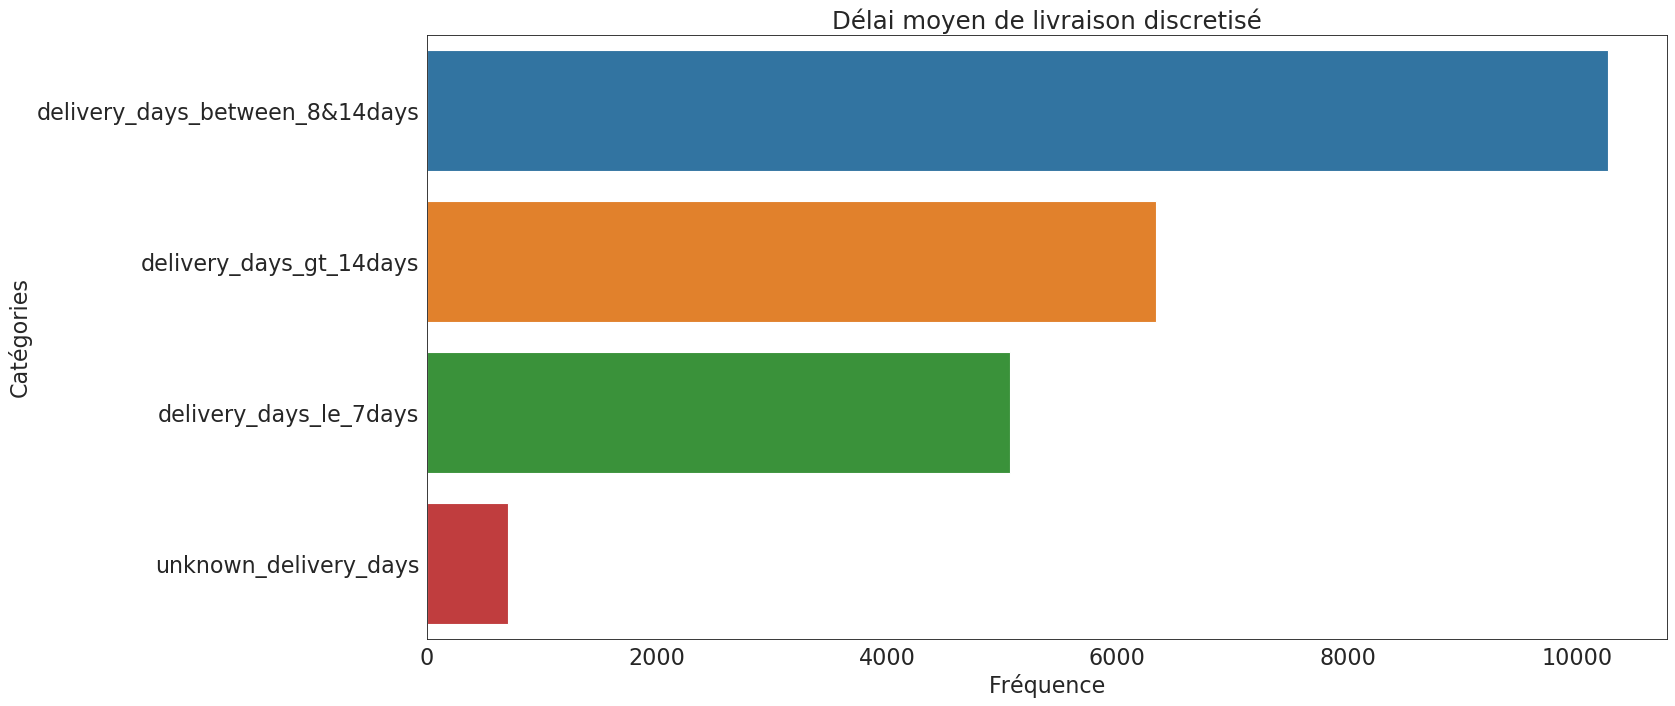

In [82]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

sampleSize = new_data['mean_delivery_days'].value_counts()

g = sns.barplot(x=sampleSize, y=sampleSize.index,ax=ax)

plt.title("Délai moyen de livraison discretisé",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Catégories",fontsize=20)
plt.xlabel("Fréquence",fontsize=20)


In [83]:
new_data.shape

(22367, 28)

### Traitement des valeurs abérrantes

In [84]:
new_data.dtypes

customer_city                           object
customer_state                          object
last_order                      datetime64[ns]
last_order_day                           int64
last_order_hour                          int64
last_order_weekday                       int64
last_order_weekOfYear                    int64
total_number_of_orders                   int64
most_purchased_product                  object
mean_review_score                      float64
total_cost_of_orders                   float64
max_order_price                        float64
mean_order_price                       float64
total_number_of_orders (M-3)           float64
total_cost_of_orders (M-3)             float64
max_order_price (M-3)                  float64
mean_order_price (M-3)                 float64
total_number_of_orders (M-6)           float64
total_cost_of_orders (M-6)             float64
max_order_price (M-6)                  float64
mean_order_price (M-6)                 float64
total_number_

In [85]:
for cols in new_data.columns:
    if new_data[cols].dtypes == 'float64':
        z = np.abs(stats.zscore(new_data[cols]))
        new_data[cols] = np.where(z<3,new_data[cols],np.nan)
        #print(cols, ' : ',z)

In [86]:
new_data.isna().sum()

customer_city                     0
customer_state                    0
last_order                        0
last_order_day                    0
last_order_hour                   0
last_order_weekday                0
last_order_weekOfYear             0
total_number_of_orders            0
most_purchased_product            0
mean_review_score                 0
total_cost_of_orders            306
max_order_price                 360
mean_order_price                366
total_number_of_orders (M-3)    237
total_cost_of_orders (M-3)      290
max_order_price (M-3)           316
mean_order_price (M-3)          310
total_number_of_orders (M-6)    227
total_cost_of_orders (M-6)      225
max_order_price (M-6)           245
mean_order_price (M-6)          247
total_number_of_orders (M-9)    134
total_cost_of_orders (M-9)      195
max_order_price (M-9)           199
mean_order_price (M-9)          200
mean_delivery_days                0
payment_type                      0
payment_installments        

In [87]:
new_data.dropna(how='any', inplace=True)
new_data.isna().sum()

customer_city                   0
customer_state                  0
last_order                      0
last_order_day                  0
last_order_hour                 0
last_order_weekday              0
last_order_weekOfYear           0
total_number_of_orders          0
most_purchased_product          0
mean_review_score               0
total_cost_of_orders            0
max_order_price                 0
mean_order_price                0
total_number_of_orders (M-3)    0
total_cost_of_orders (M-3)      0
max_order_price (M-3)           0
mean_order_price (M-3)          0
total_number_of_orders (M-6)    0
total_cost_of_orders (M-6)      0
max_order_price (M-6)           0
mean_order_price (M-6)          0
total_number_of_orders (M-9)    0
total_cost_of_orders (M-9)      0
max_order_price (M-9)           0
mean_order_price (M-9)          0
mean_delivery_days              0
payment_type                    0
payment_installments            0
dtype: int64

In [88]:
new_data.shape

(20853, 28)

## 3. Deuxième analyse exploratoire des fichiers de données

In [89]:
new_data['customer_state'].nunique()

27

In [90]:
data00 = new_data.groupby(
    ['customer_city']).count()

data00.head()

customer_state  last_order  last_order_day  last_order_hour  \
customer_city                                                                
abaete                      5           5               5                5   
abaetetuba                  1           1               1                1   
abare                       1           1               1                1   
abdon batista               1           1               1                1   
abelardo luz                1           1               1                1   

               last_order_weekday  last_order_weekOfYear  \
customer_city                                              
abaete                          5                      5   
abaetetuba                      1                      1   
abare                           1                      1   
abdon batista                   1                      1   
abelardo luz                    1                      1   

               total_number_of_orders  most_purchased_product  \
customer_city                                                   
abaete                              5                       5   
abaetetuba                          1                       1   
abare                               1                       1   
abdon batista                       1                       1   
abelardo luz                        1                       1   

               mean_review_score  total_cost_of_orders  max_order_price  \
customer_city                                                             
abaete                         5                     5                5   
abaetetuba                     1                     1                1   
abare                          1                     1                1   
abdon batista                  1                     1                1   
abelardo luz                   1                     1                1   

               mean_order_price  total_number_of_orders (M-3)  \
customer_city                                                   
abaete                        5                             5   
abaetetuba                    1                             1   
abare                         1                             1   
abdon batista                 1                             1   
abelardo luz                  1                             1   

               total_cost_of_orders (M-3)  max_order_price (M-3)  \
customer_city                                                      
abaete                                  5                      5   
abaetetuba                              1                      1   
abare                                   1                      1   
abdon batista                           1                      1   
abelardo luz                            1                      1   

               mean_order_price (M-3)  total_number_of_orders (M-6)  \
customer_city                                                         
abaete                              5                             5   
abaetetuba                          1                             1   
abare                               1                             1   
abdon batista                       1                             1   
abelardo luz                        1                             1   

               total_cost_of_orders (M-6)  max_order_price (M-6)  \
customer_city                                                      
abaete                                  5                      5   
abaetetuba                              1                      1   
abare                                   1                      1   
abdon batista                           1                      1   
abelardo luz                            1                      1   

               mean_order_price (M-6)  total_number_of_orders (M-9)  \
customer_city                                                         
abaete         

In [91]:
new_data['customer_city'].value_counts().head(10)

sao paulo                2915
rio de janeiro           1539
belo horizonte            536
brasilia                  382
porto alegre              337
curitiba                  290
campinas                  279
salvador                  244
guarulhos                 225
sao bernardo do campo     178
Name: customer_city, dtype: int64

last_order_day


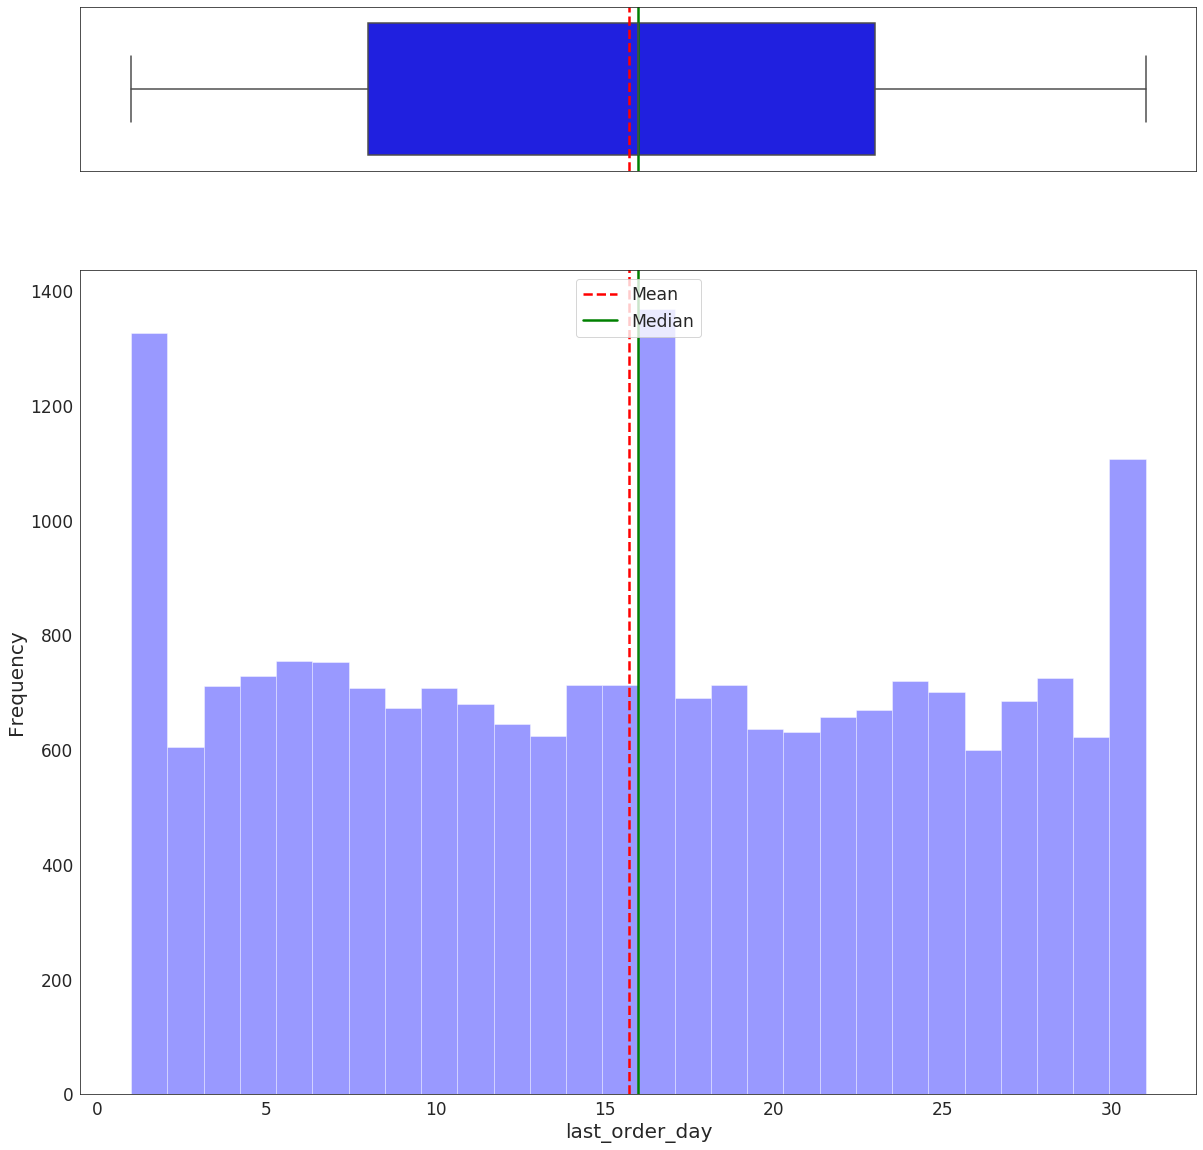

last_order_hour


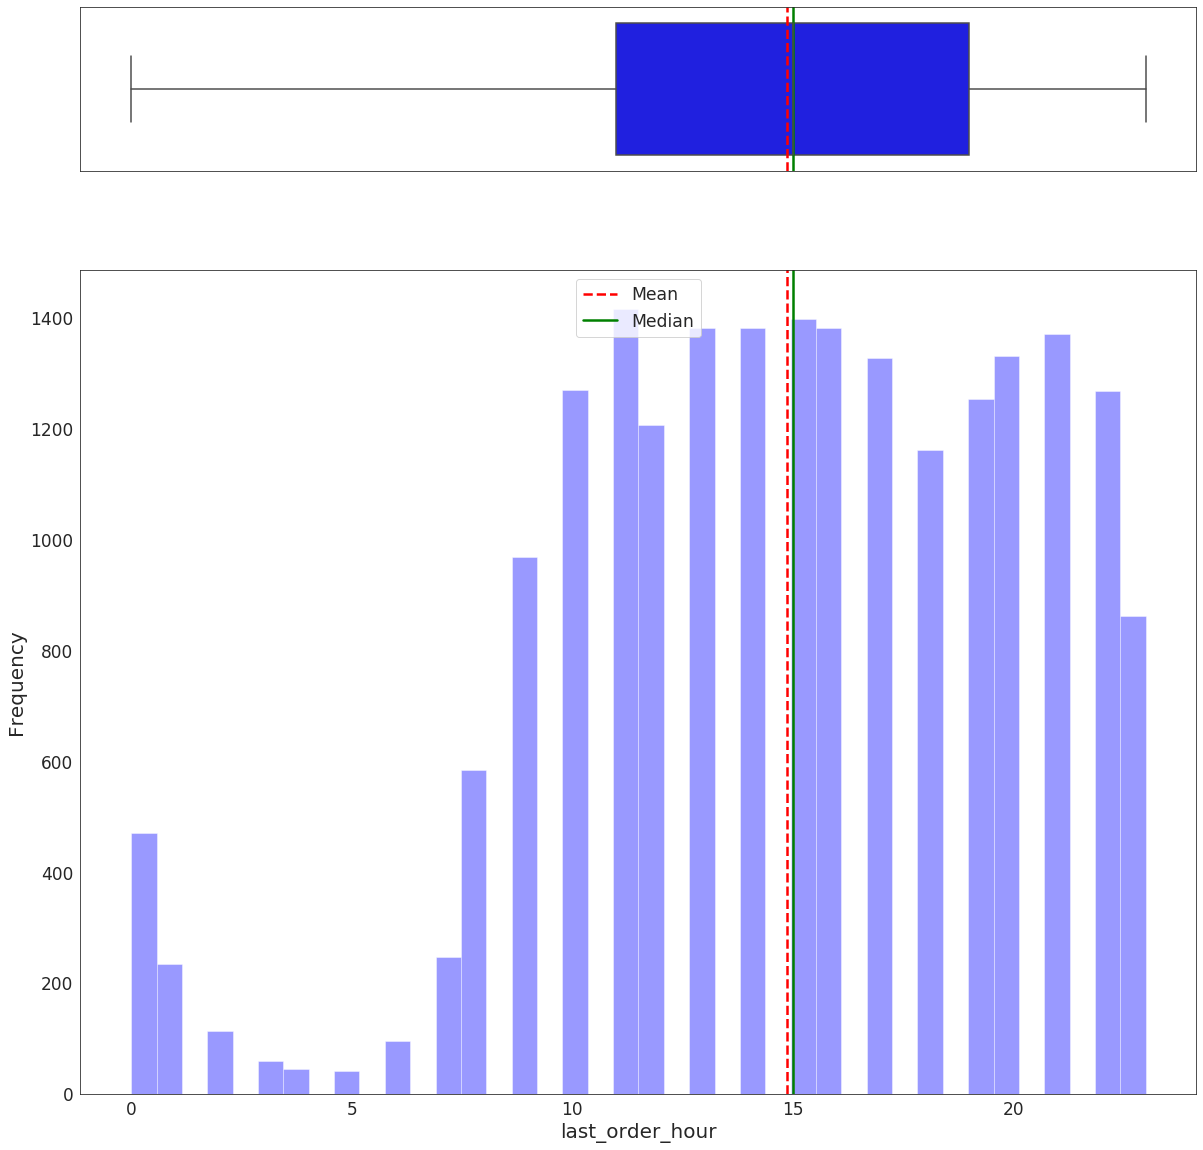

last_order_weekday


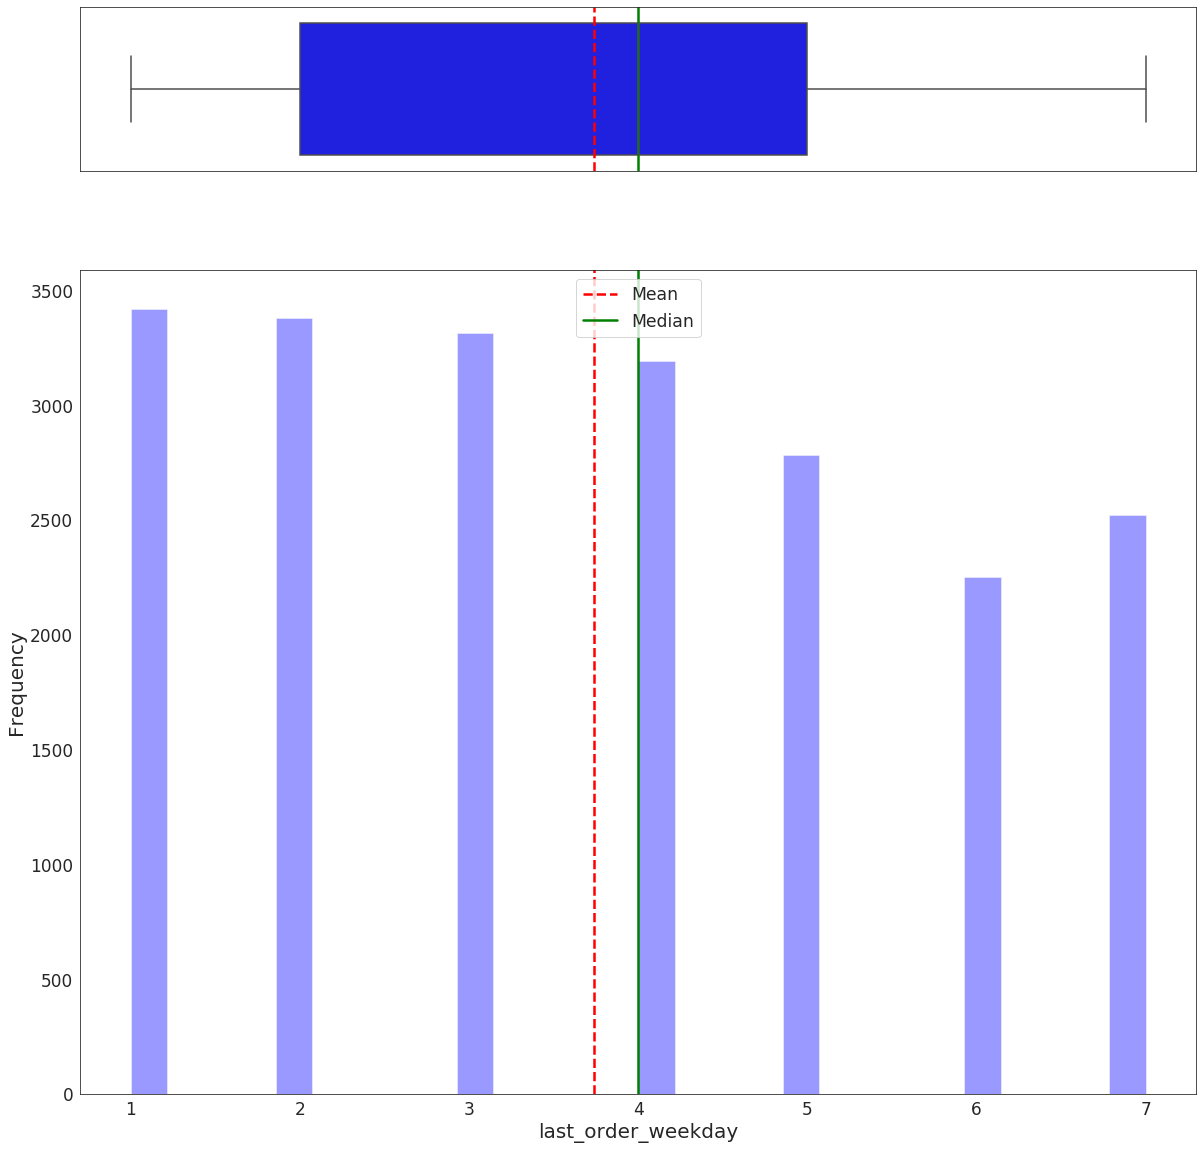

last_order_weekOfYear


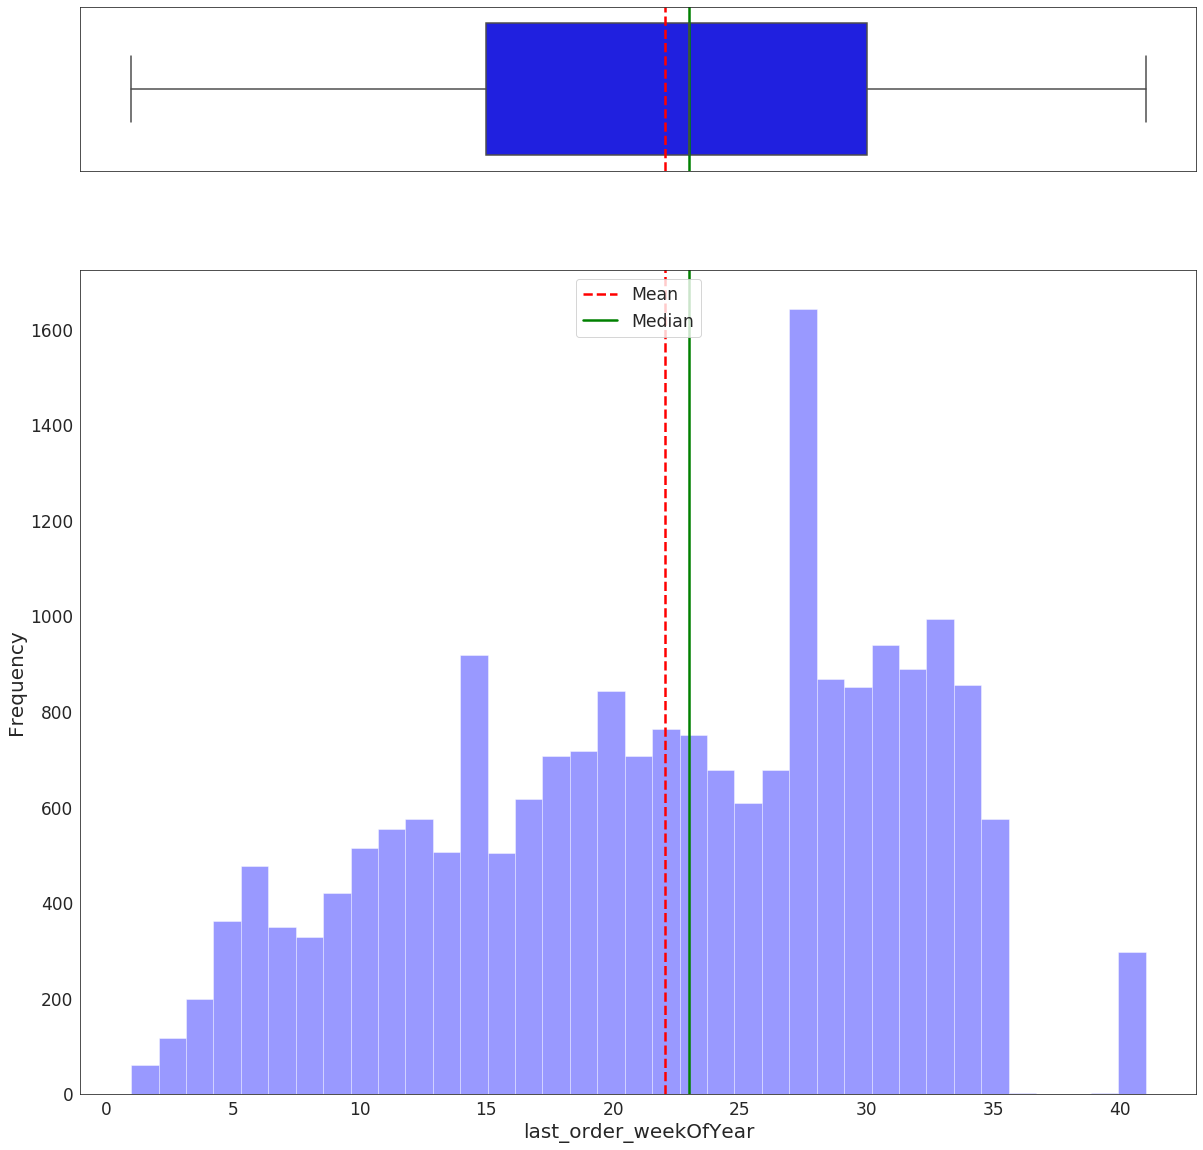

total_number_of_orders


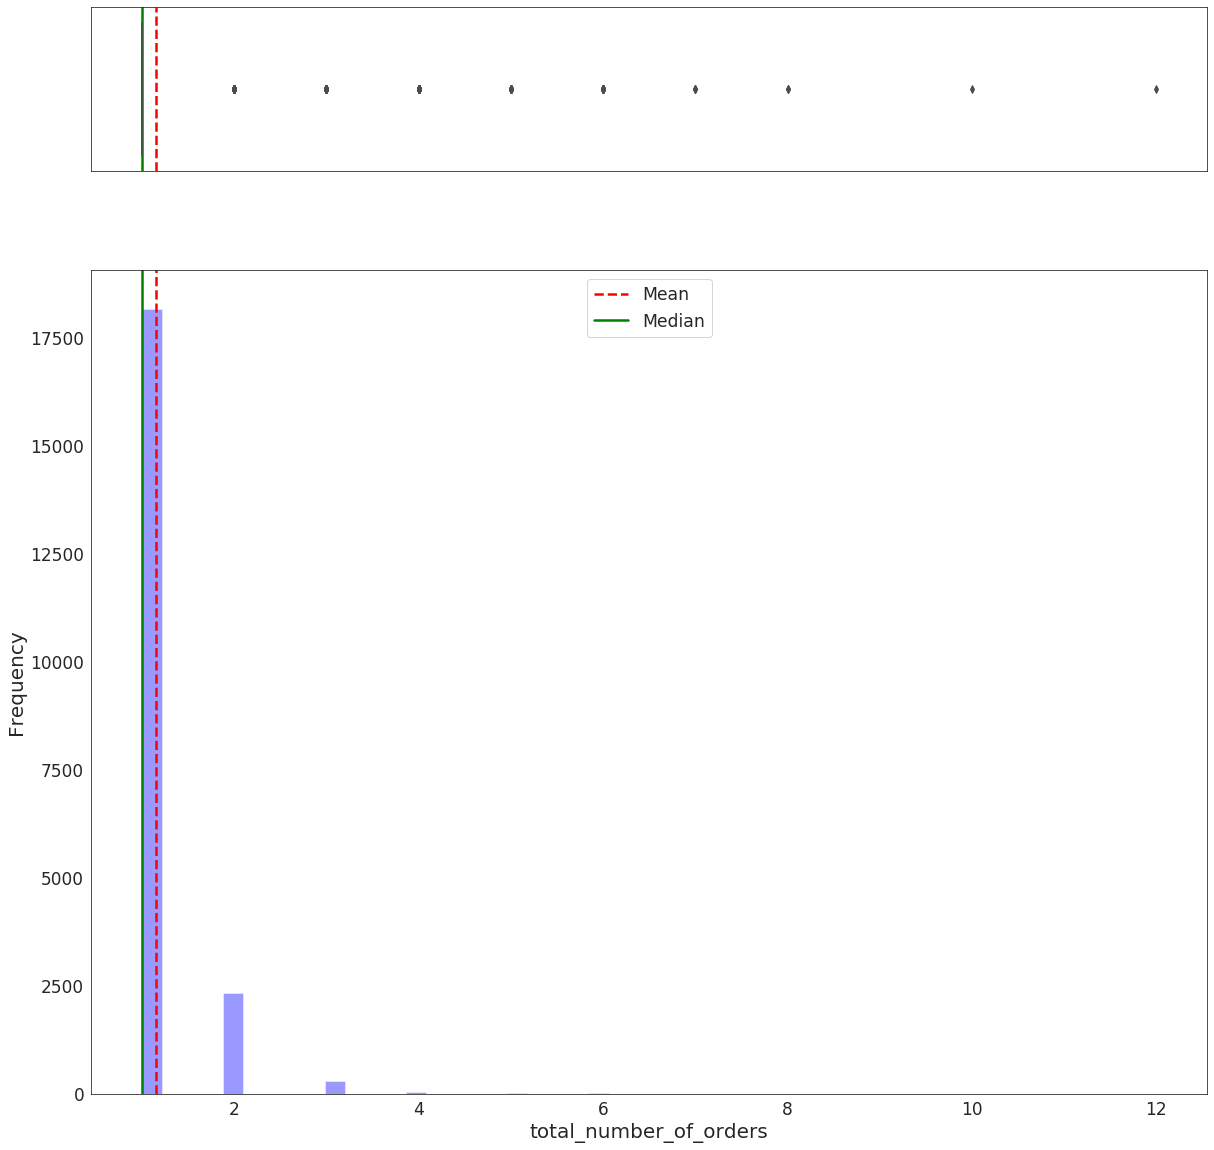

mean_review_score


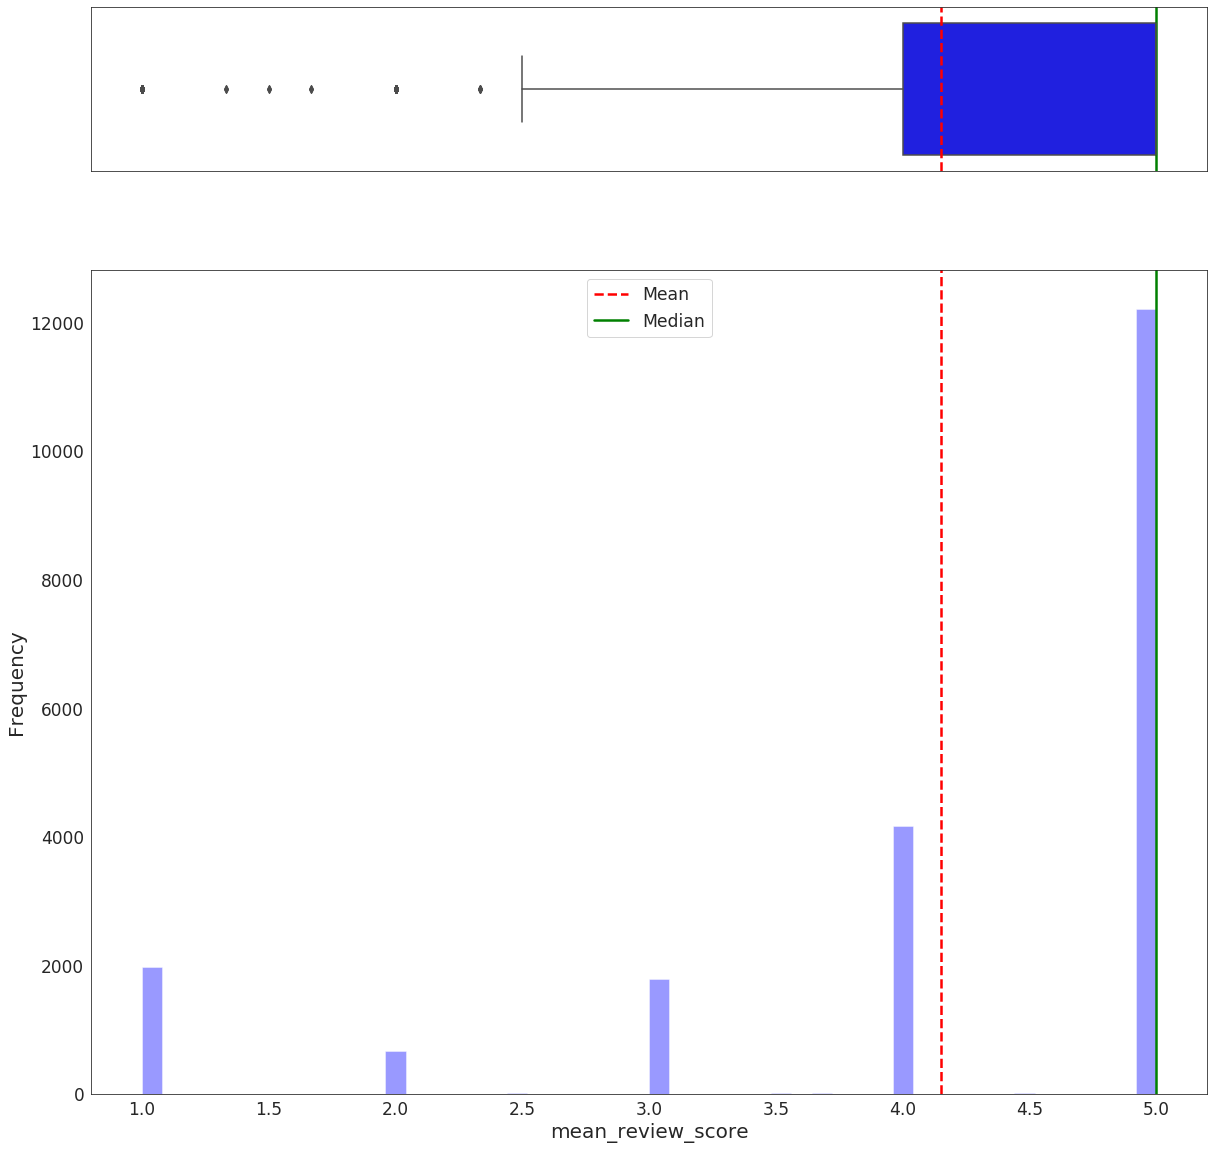

total_cost_of_orders


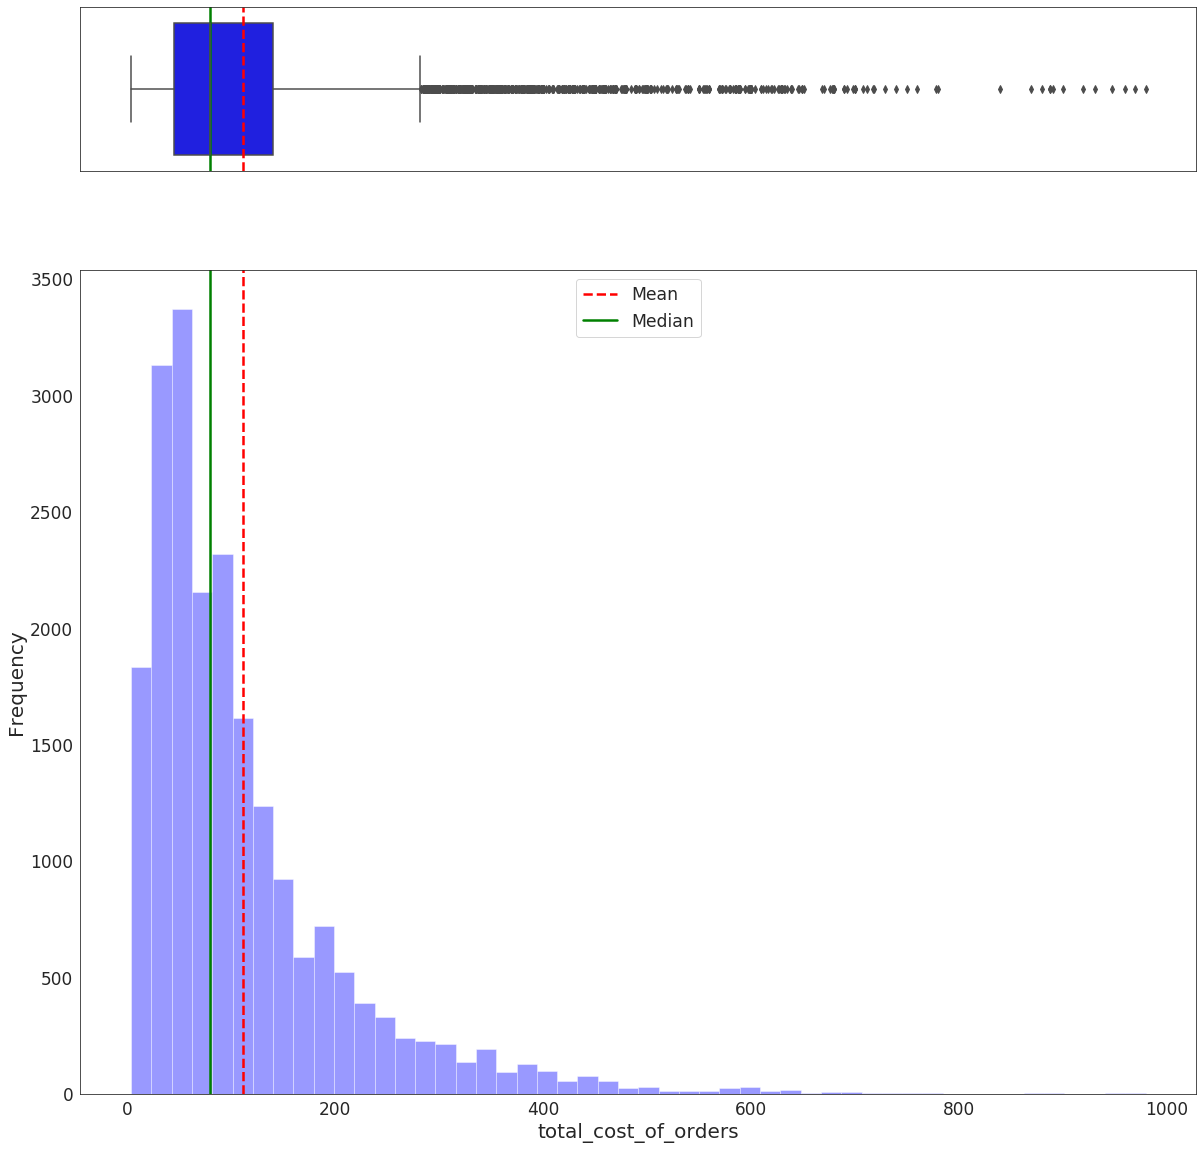

max_order_price


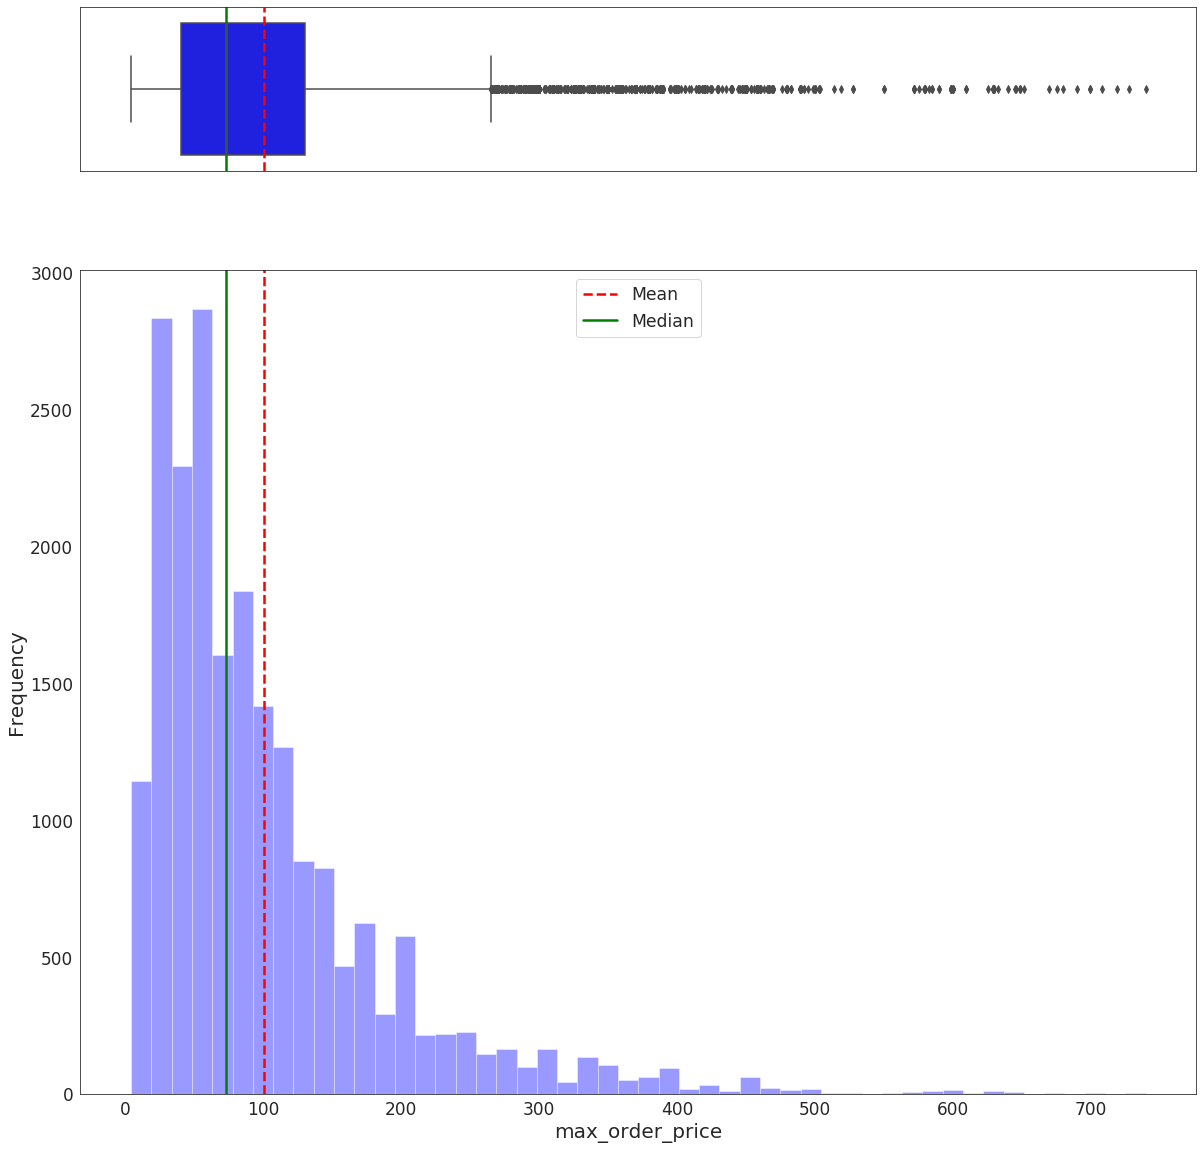

mean_order_price


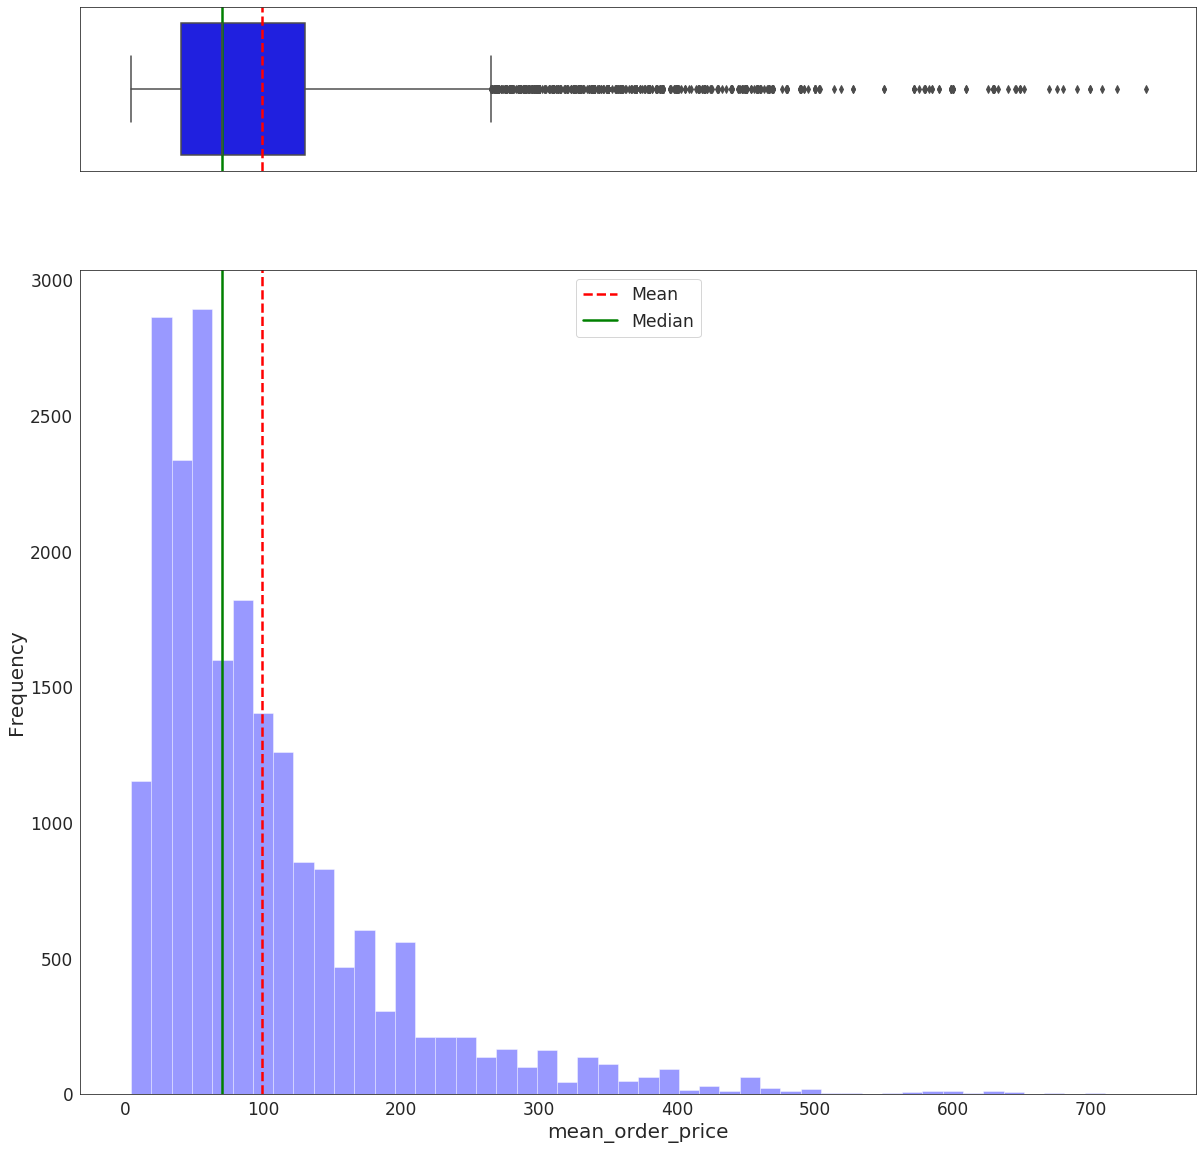

total_number_of_orders (M-3)


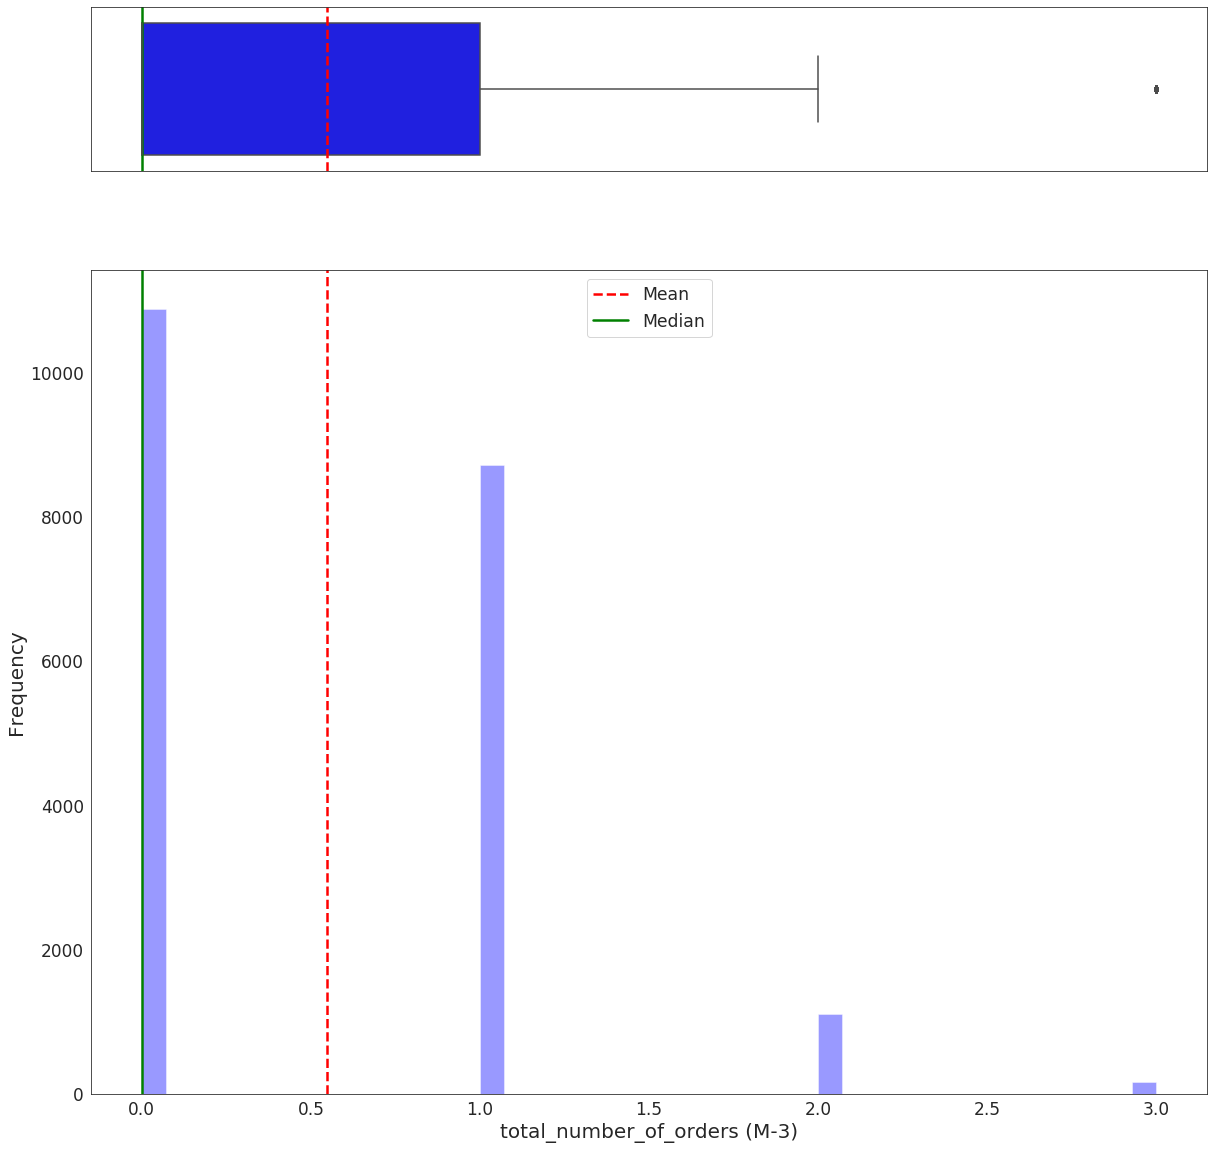

total_cost_of_orders (M-3)


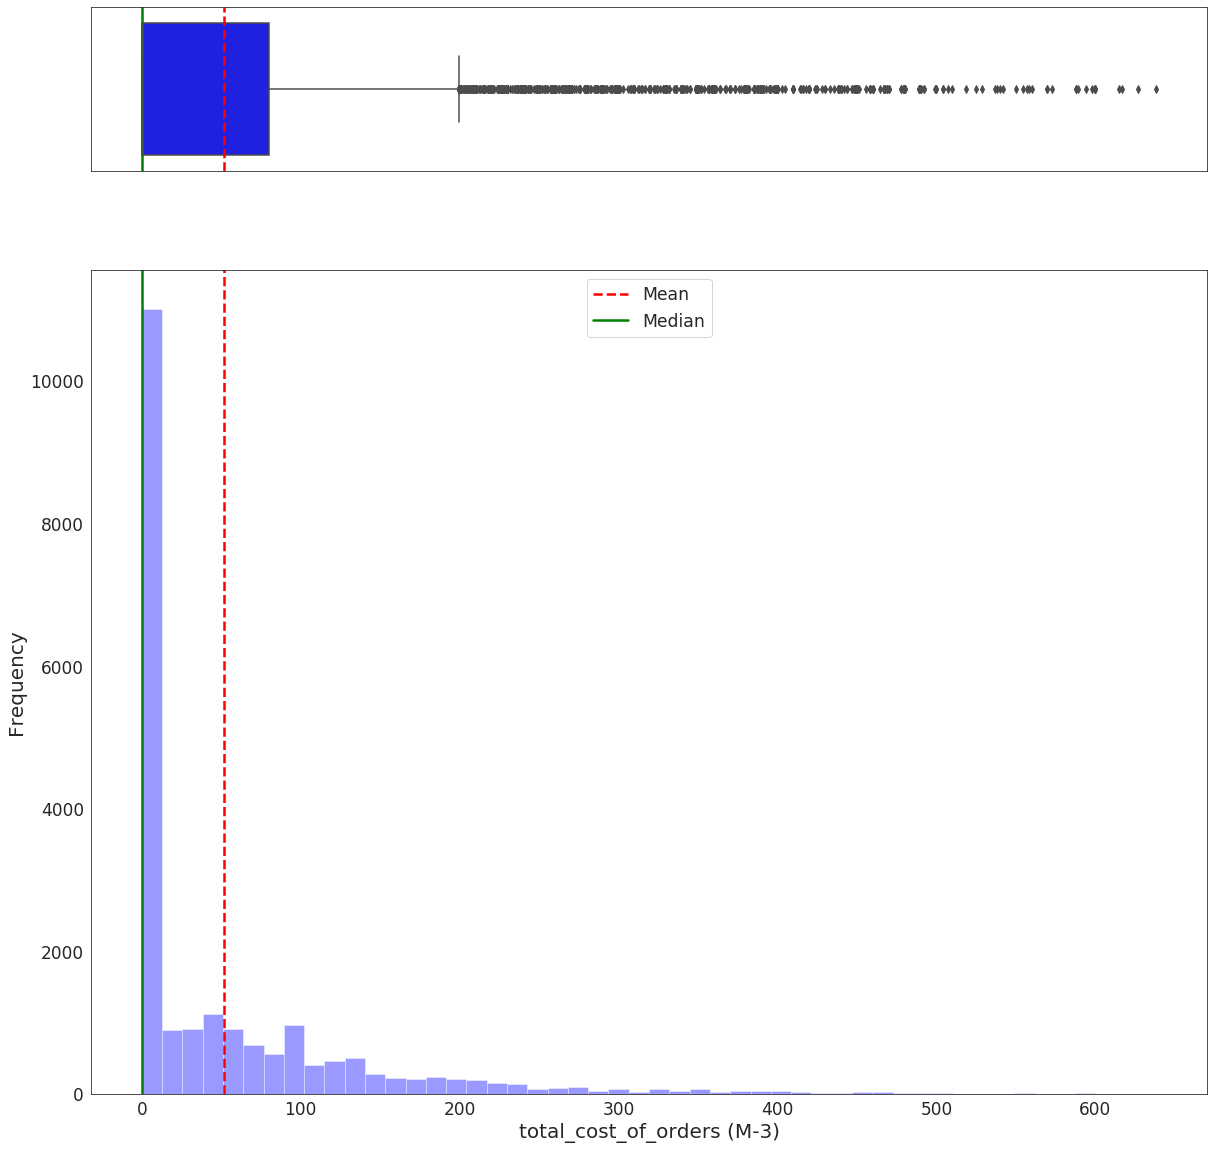

max_order_price (M-3)


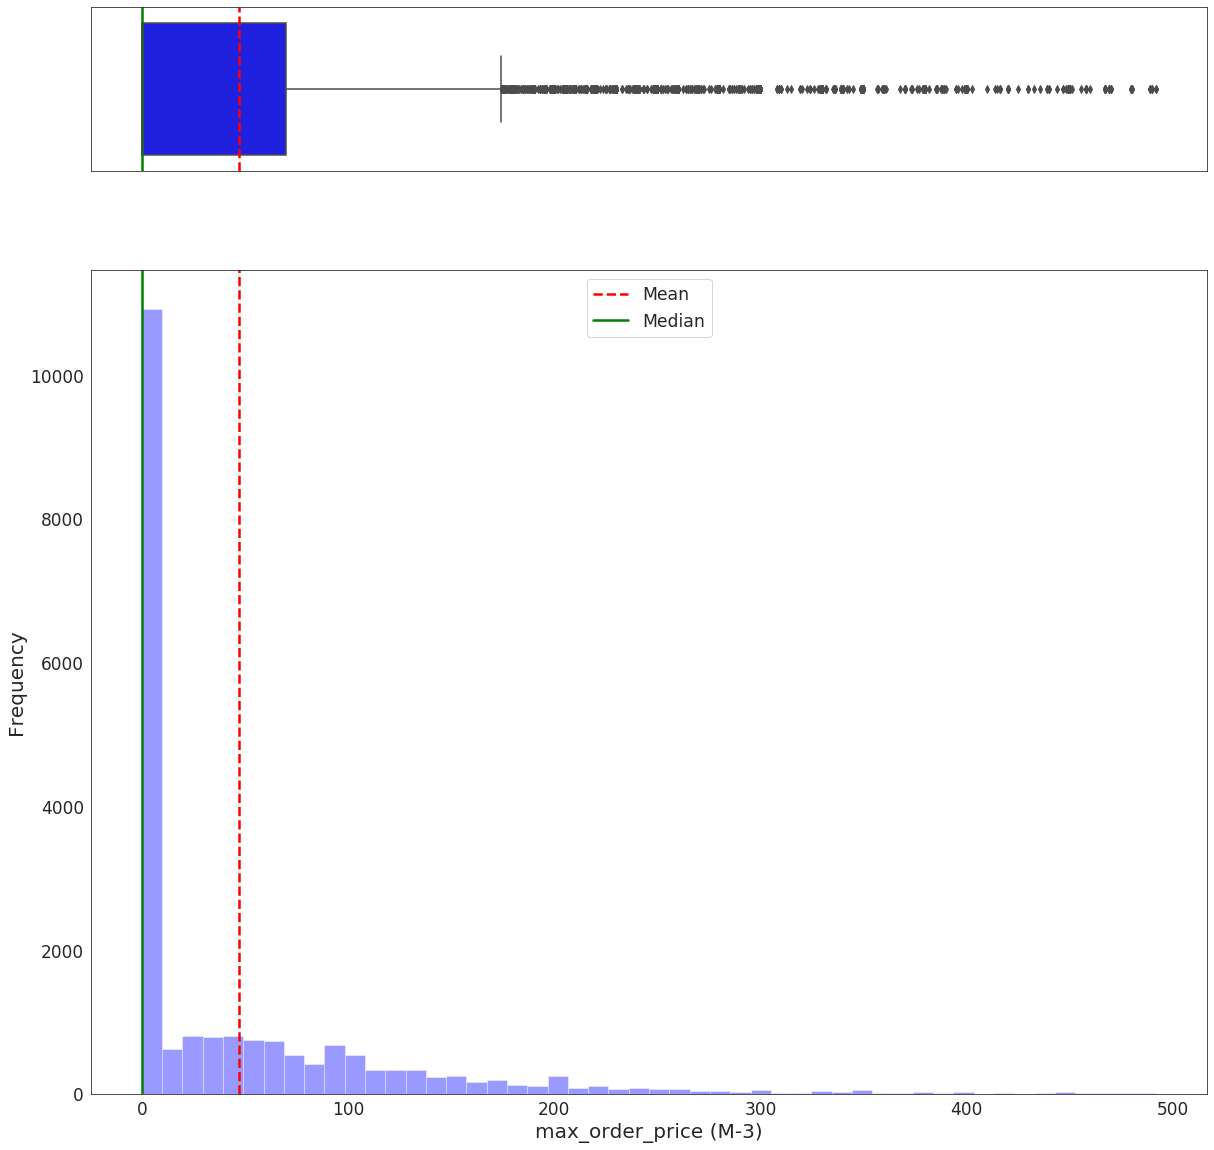

mean_order_price (M-3)


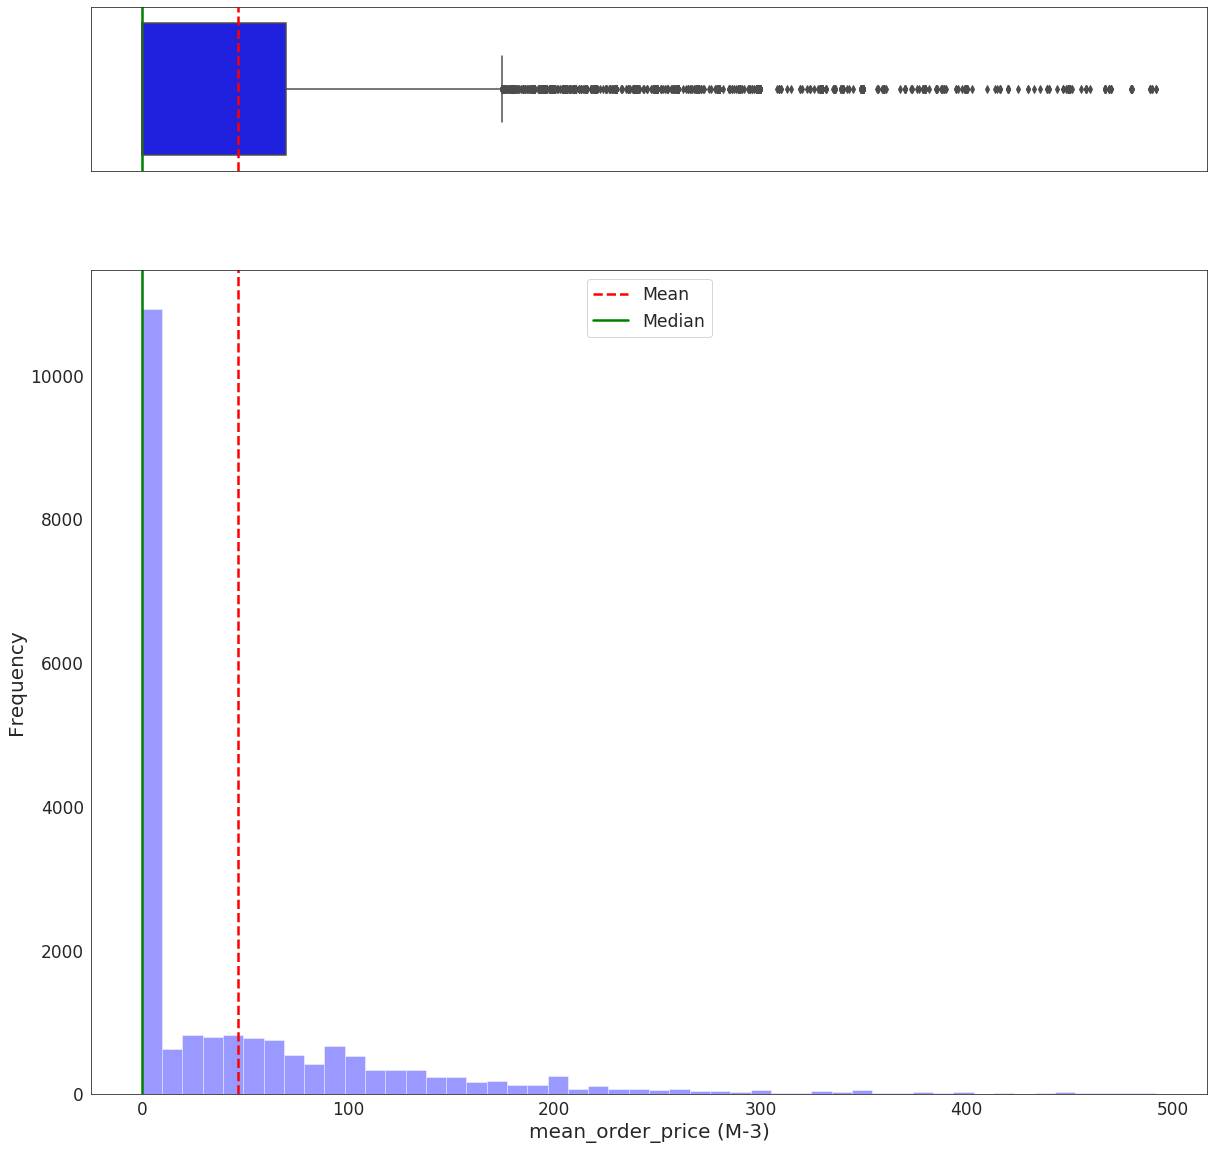

total_number_of_orders (M-6)


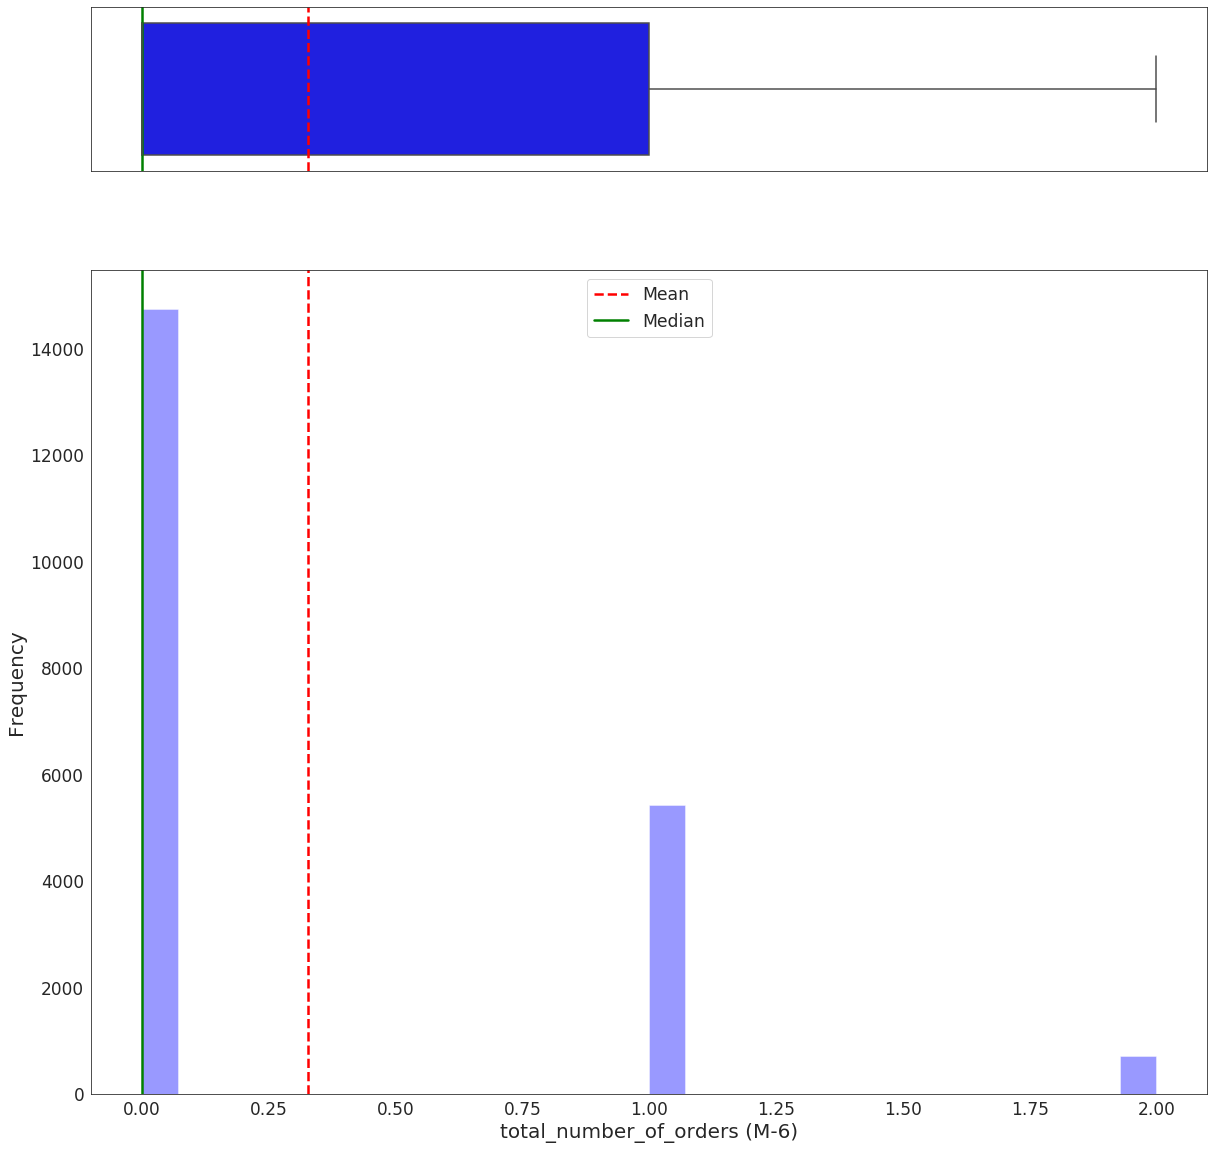

total_cost_of_orders (M-6)


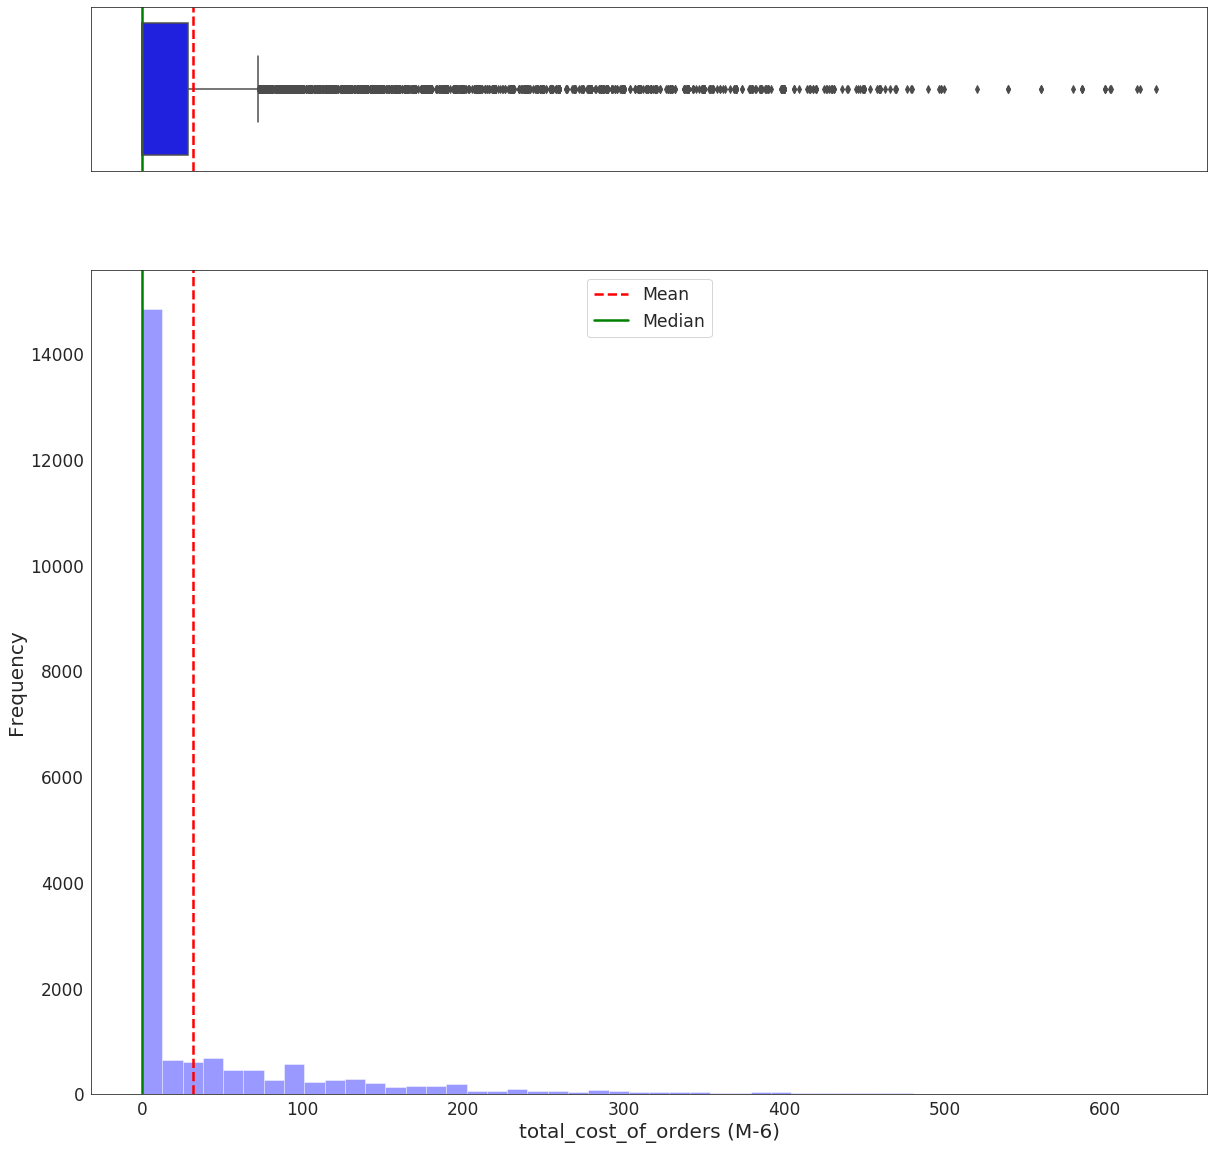

max_order_price (M-6)


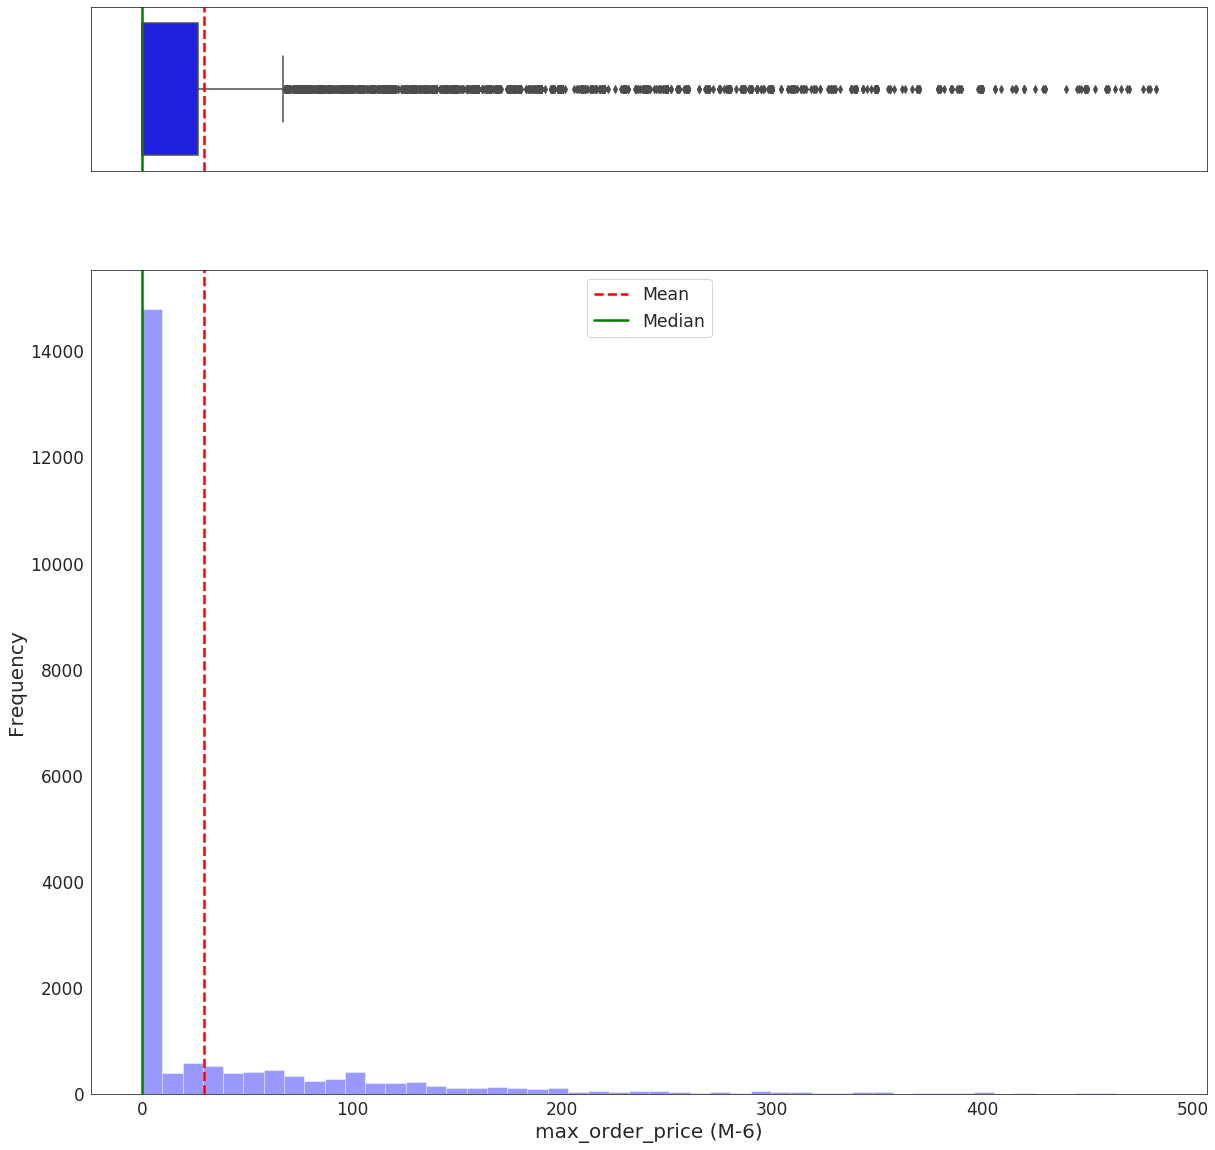

mean_order_price (M-6)


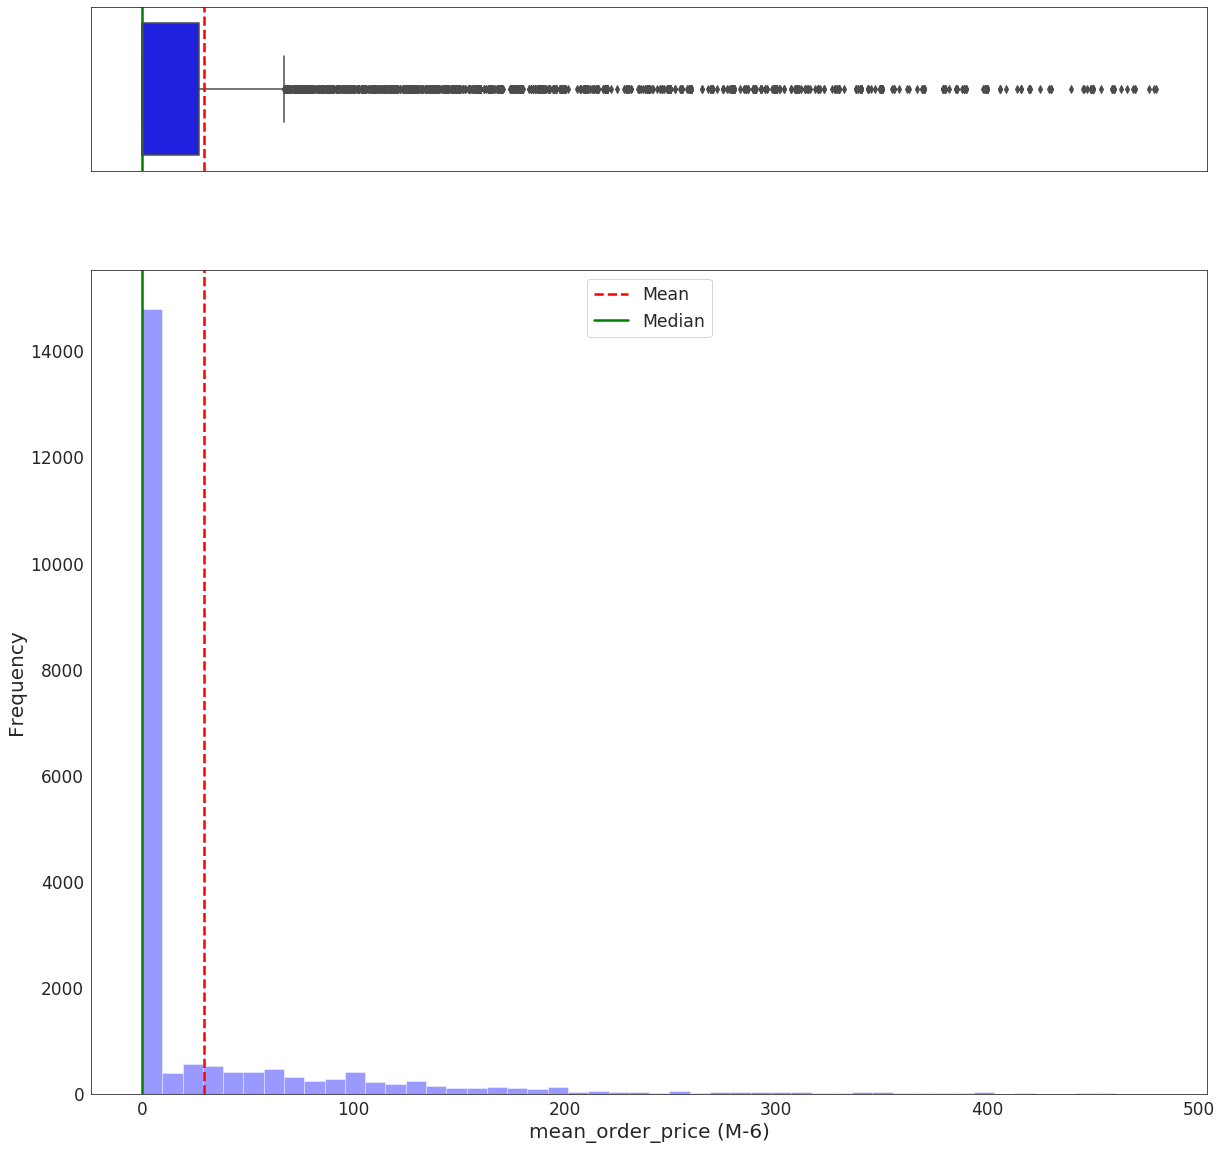

total_number_of_orders (M-9)


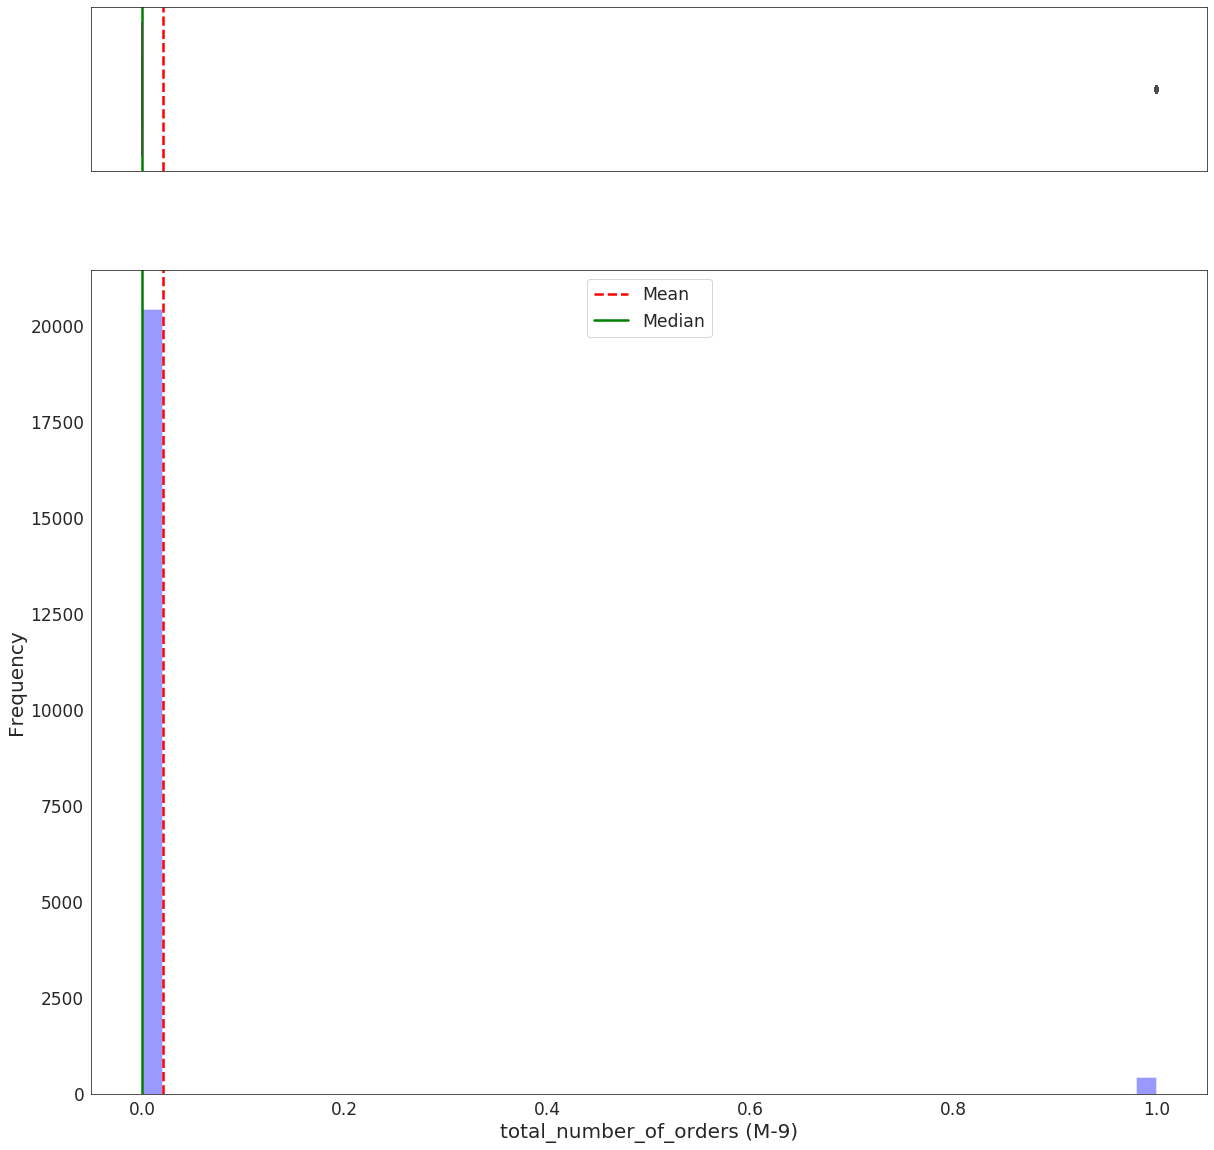

total_cost_of_orders (M-9)


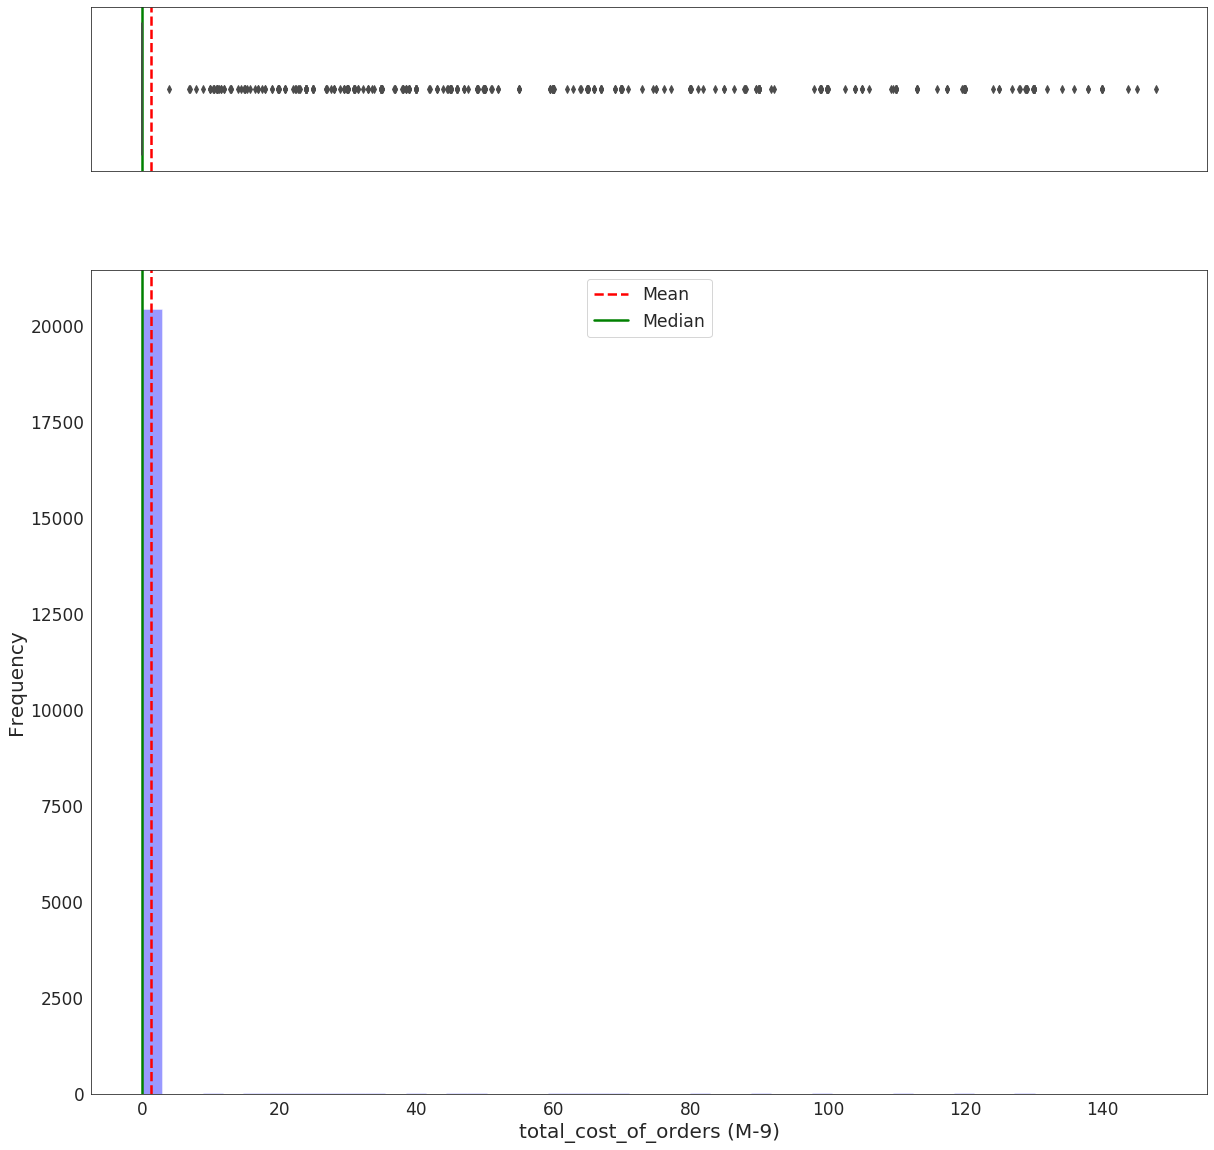

max_order_price (M-9)


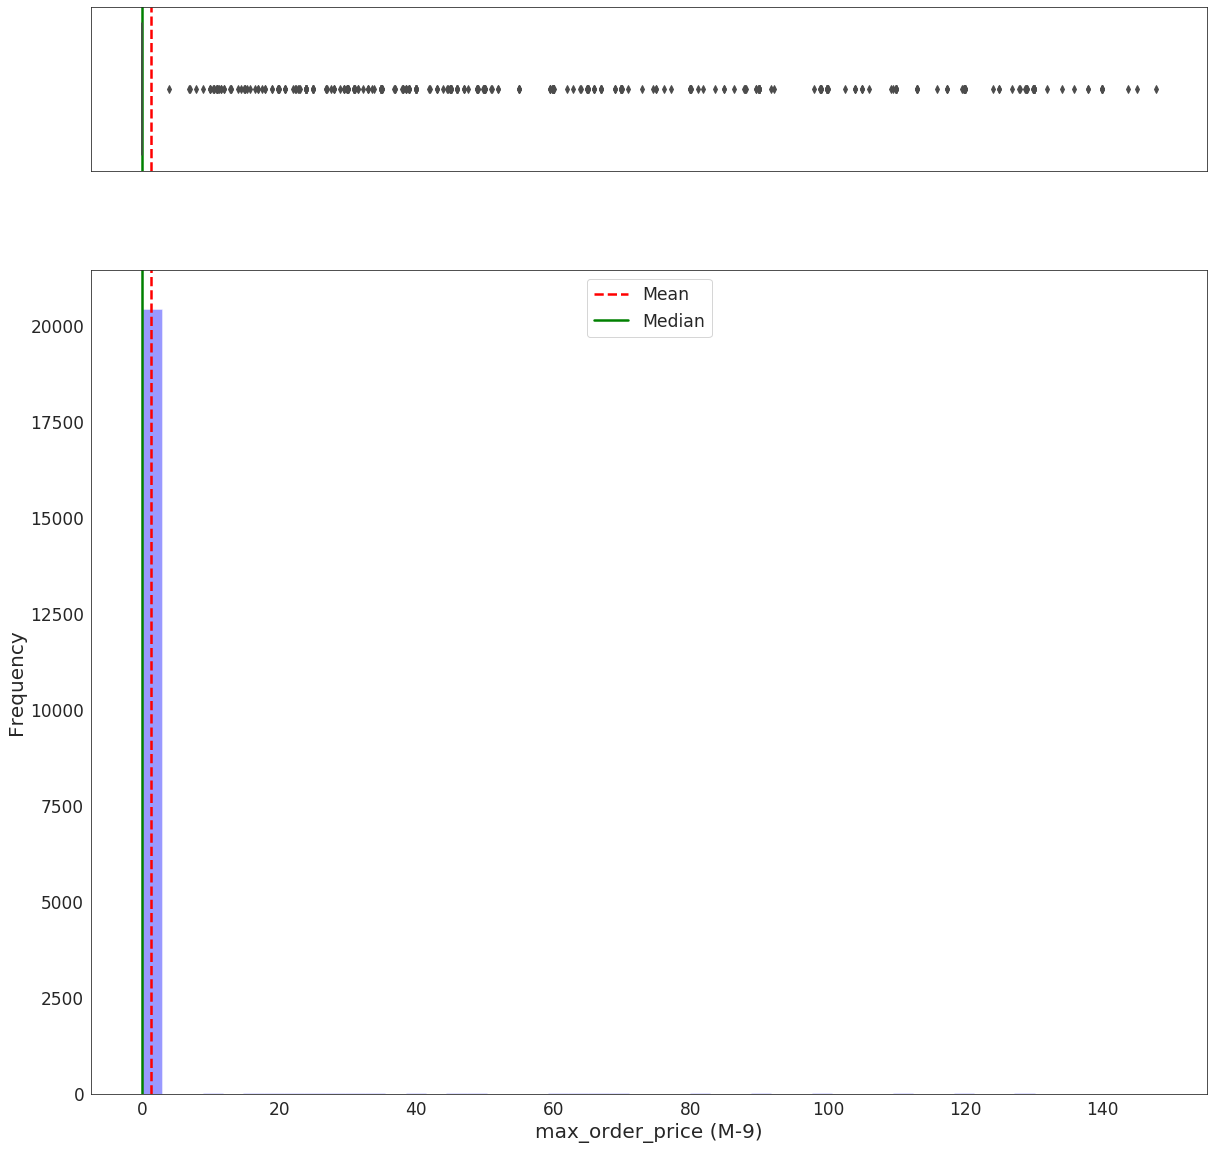

mean_order_price (M-9)


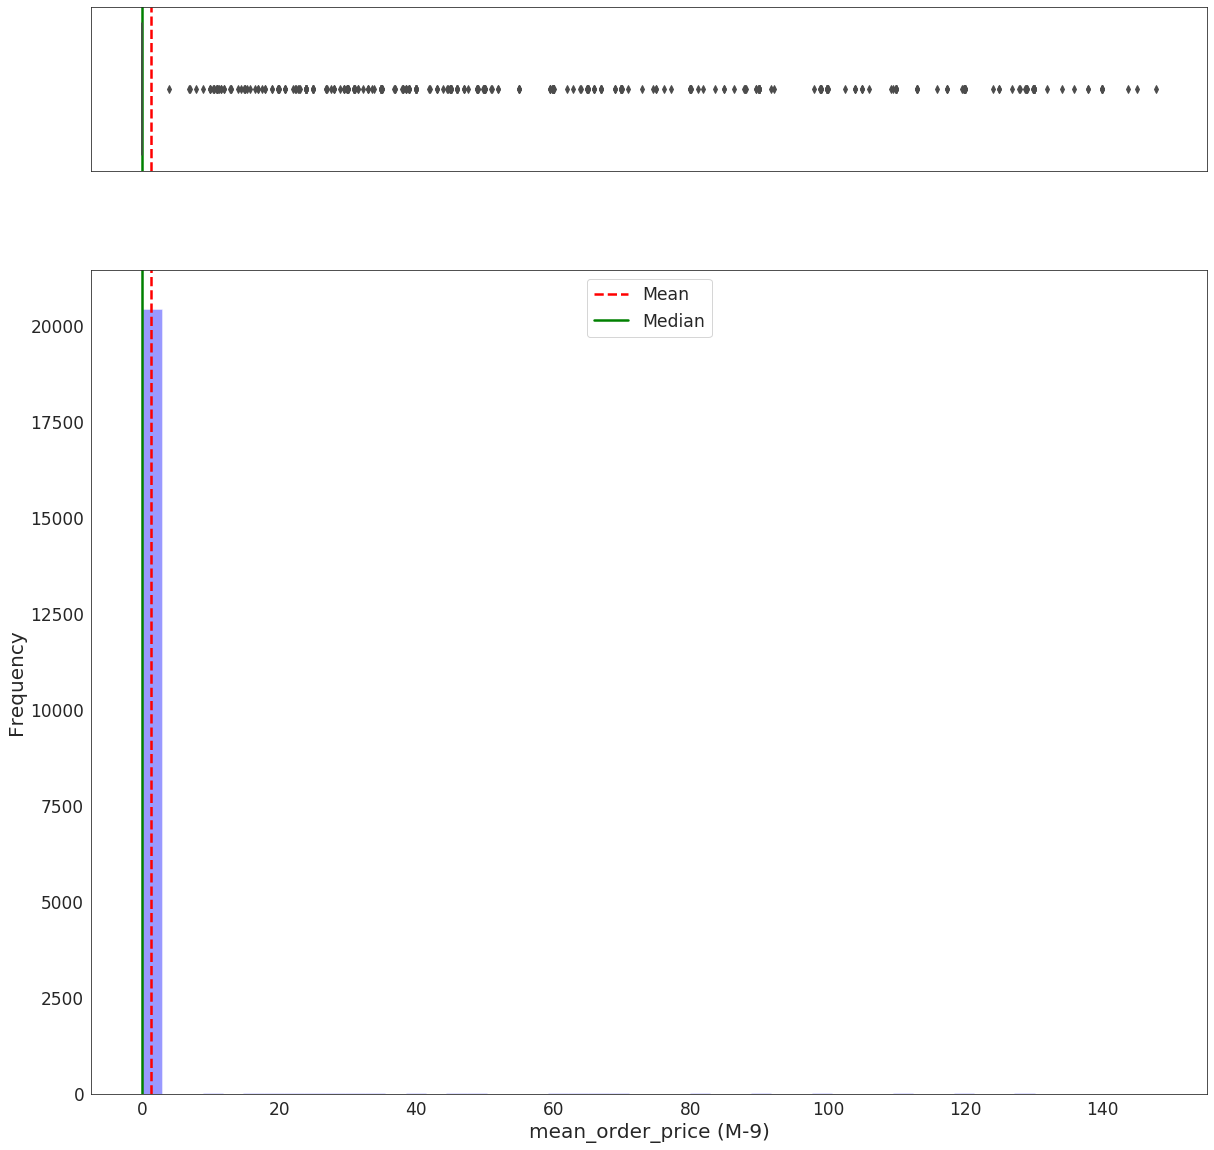

payment_installments


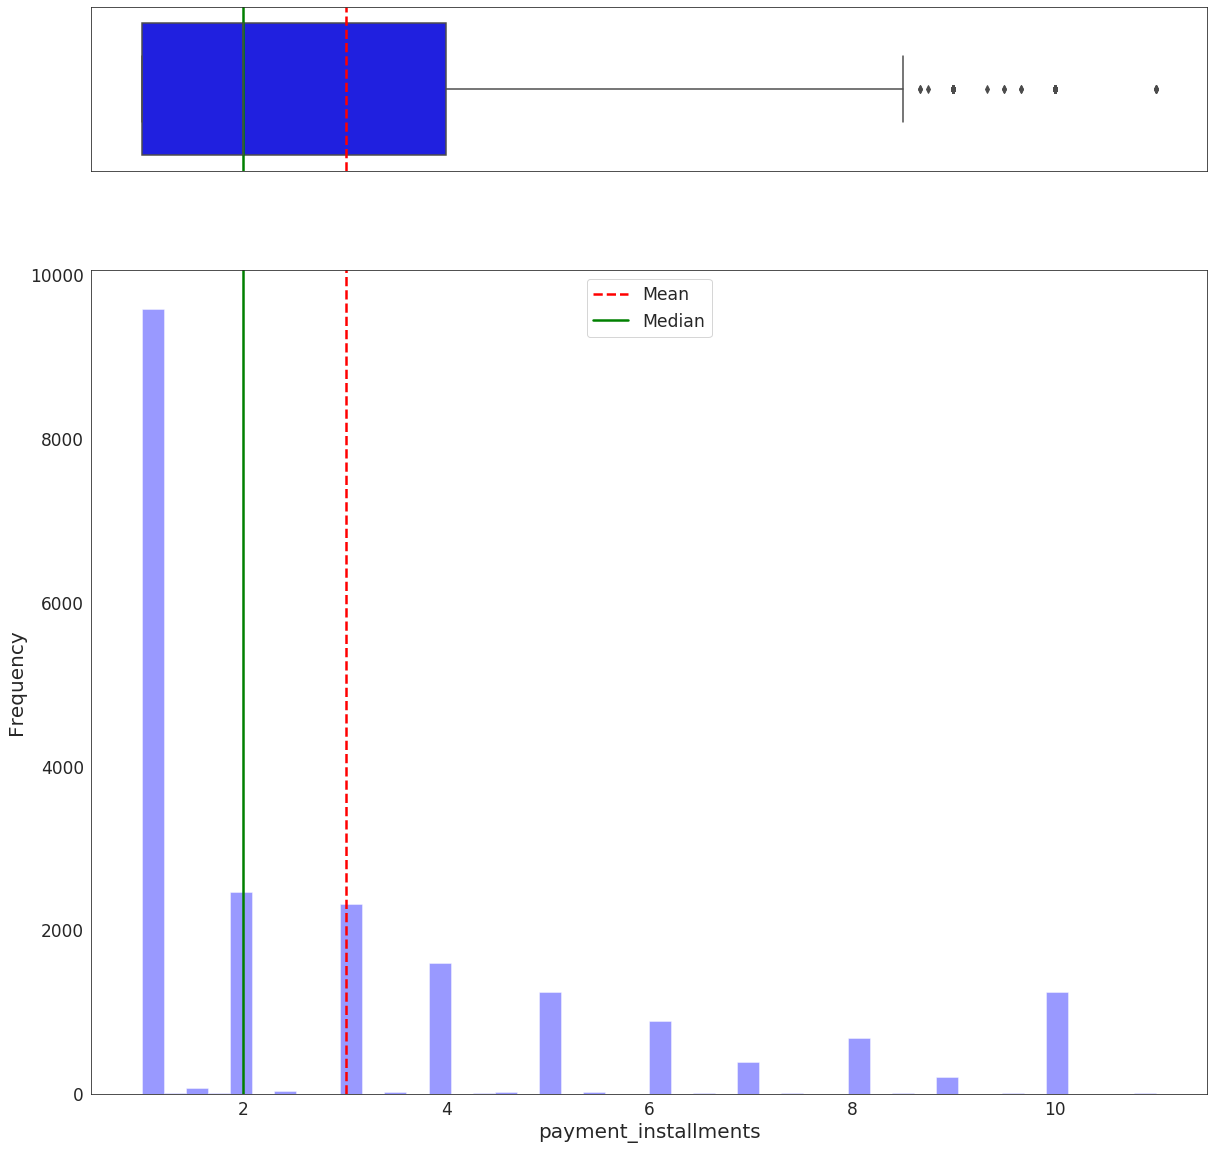

In [93]:
newData = new_data.select_dtypes(['int64','float64'])
for cols in newData.columns:
    print(cols)
    dataMean = newData[cols].dropna().mean()
    dataMedian = newData[cols].dropna().median()
    
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    
    sns.boxplot(newData[cols].dropna(),color="blue",ax=ax_box)
    ax_box.axvline(float(dataMean),color='r', linestyle='--',linewidth=2.5)
    ax_box.axvline(float(dataMedian), color='g', linestyle='-',linewidth=2.5)
    ax_box.set_xlabel("")
    ax_box.set_ylabel("")

    xx = 0.75
    location = 'upper center'
        
    sns.distplot(newData[cols].dropna(),kde=False,color="blue",ax=ax_hist)
    #ax_hist.text(x=xx, y=0.52, transform=ax.transAxes, s="Skewness: %.2f" % newData[cols].dropna().skew(),\
    #        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
    #        backgroundcolor='white', color='navy')
    #ax_hist.text(x=xx, y=0.50, transform=ax.transAxes, s="Kurtosis: %.2f" % newData[cols].dropna().kurt(),\
    #        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
    #        backgroundcolor='white', color='navy')
    #ax_hist.text(x=xx, y=0.48, transform=ax.transAxes, s="Moyenne: %.2f" % newData[cols].dropna().mean(),\
    #       fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
    #       backgroundcolor='white', color='navy')
    #ax_hist.text(x=xx, y=0.46, transform=ax.transAxes, s="Ecart-type: %.2f" % newData[cols].dropna().std(),\
    #       fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
    #       backgroundcolor='white', color='navy')
    
    yMinMax = ax_hist.get_ylim()
    
    ax_hist.axvline(float(dataMean),yMinMax[0],yMinMax[1],color='r', linestyle='--',linewidth=2.5)
    ax_hist.axvline(float(dataMedian),yMinMax[0],yMinMax[1], color='g', linestyle='-',linewidth=2.5)
        
    plt.legend({'Mean':float(dataMean),'Median':float(dataMedian)},loc=location,fontsize='xx-large')
    plt.xlabel(cols,fontsize=20)
    plt.ylabel('Frequency',fontsize=20)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    
    #figName = 'distribution_nutriscore.png'
    #plt.savefig(figName,bbox_inches="tight")
    plt.show()

In [94]:
import scipy.stats as stats

def corMatWithPValues(dataframe):
    cols = dataframe.shape[1]
    r = pd.DataFrame(np.ones(shape=(cols, cols)),index=dataframe.columns,columns=dataframe.columns)
    p = pd.DataFrame(np.ones(shape=(cols, cols)),index=dataframe.columns,columns=dataframe.columns)
    
    for i in range(cols):
        for j in range(i+1, cols):
            cor, pval = stats.pearsonr(dataframe.iloc[:,i], dataframe.iloc[:,j])
            r.iloc[i, j] = r.iloc[j, i] = cor
            p.iloc[i, j] = p.iloc[j, i] = pval

    return r, p

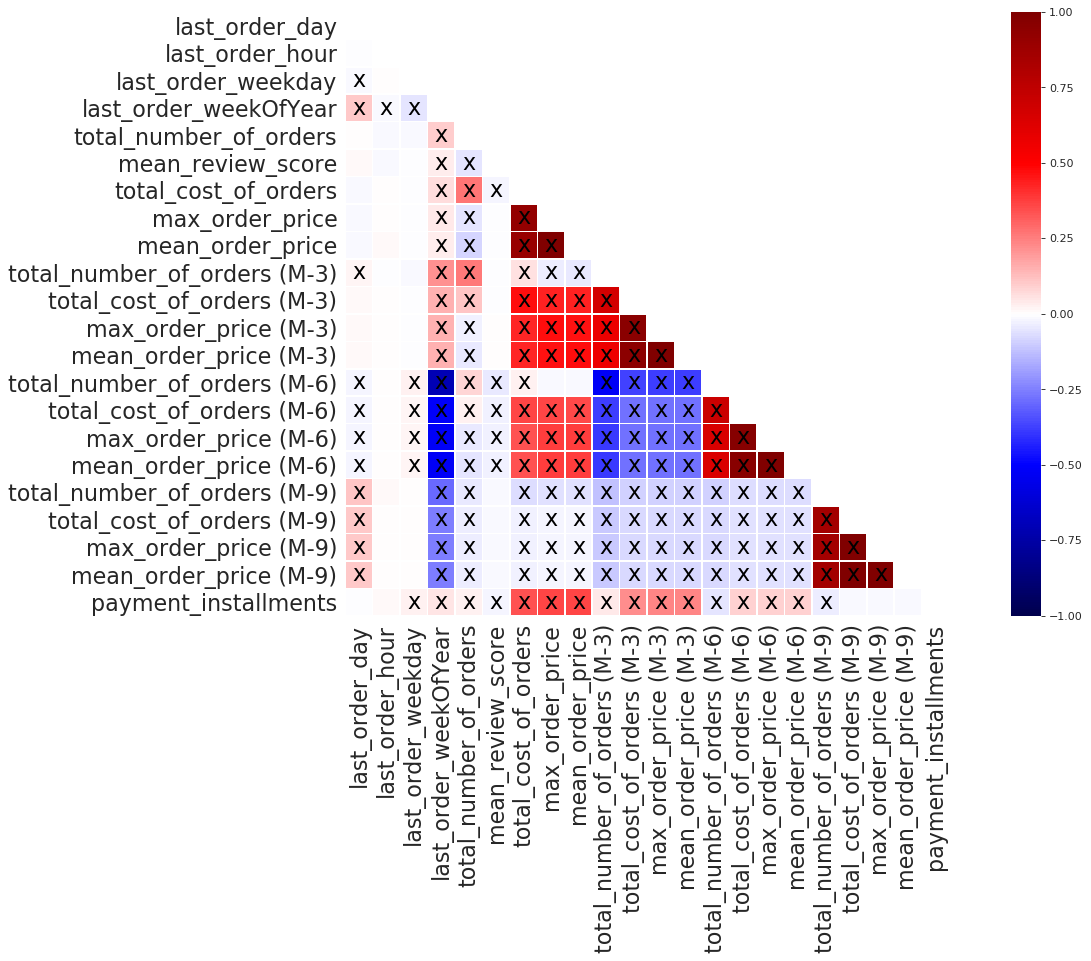

In [95]:
corMat, pValue = corMatWithPValues(newData.dropna(how='any'))

fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

mask = np.triu(np.ones_like(corMat, dtype=np.bool))

g = sns.heatmap(corMat, mask=mask, cmap='seismic',center=0,vmin=-1,vmax=1,square=True,
                linewidths=.5,ax=ax)

#ax.scatter(corMat.iloc[:,0],corMat.iloc[0,:], marker="x", color="black", s=100)

for j in range(len(newData.columns)):
    for i in range(len(newData.columns)):
        if pValue.iloc[i,j] < 0.05 and mask[i,j]:
            text = ax.text(i+0.5, j+0.5, 'x',horizontalalignment="center", verticalalignment="center",
                           fontsize=20,color="black")
        
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

figName = 'correlation_matrix_categories.png'
#plt.savefig(figName,bbox_inches="tight")
#corMat.head()
plt.show()

### ACP

In [97]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

X = new_data.drop(['customer_city'],axis=1)

catColumns = X.select_dtypes(include=['object']).columns
numColumns = X.select_dtypes(include=['int64','float64']).columns

encoder = OneHotEncoder(sparse=False)
std_scale = StandardScaler().fit(X[numColumns])

encodedData = pd.DataFrame(data = encoder.fit_transform(
    X[catColumns]),index=X.index,columns=encoder.get_feature_names().tolist()).astype('int32')

X2 = std_scale.transform(X[numColumns])
X_scaled = pd.DataFrame(data = X2,index=X.index,columns=numColumns)

newX = X_scaled.merge(encodedData,left_index = True, right_index = True)
newX.head()

last_order_day  last_order_hour  \
customer_unique_id                                                  
b4527423469300ee354458e1b5f961be       -1.215311         0.214053   
af0f26435fade1ca984d9affda307199        1.616700        -0.730075   
f421a2a66b69dbfe6db0c87845281a90        0.597176         0.969355   
00ac9cd5c4ad19e16e7c6f6864711737        1.390139        -0.163598   
51dc56123336c573f2977f5da81b17b9        1.276859        -1.107725   

                                  last_order_weekday  last_order_weekOfYear  \
customer_unique_id                                                            
b4527423469300ee354458e1b5f961be            0.642084              -0.449601   
af0f26435fade1ca984d9affda307199           -0.375037               1.439058   
f421a2a66b69dbfe6db0c87845281a90           -1.392158               1.327961   
00ac9cd5c4ad19e16e7c6f6864711737            0.642084              -0.560698   
51dc56123336c573f2977f5da81b17b9            0.133524              -0.560698   

                                  total_number_of_orders  mean_review_score  \
customer_unique_id                                                            
b4527423469300ee354458e1b5f961be               -0.337228          -2.471568   
af0f26435fade1ca984d9affda307199                1.833880          -0.903164   
f421a2a66b69dbfe6db0c87845281a90               -0.337228           0.665239   
00ac9cd5c4ad19e16e7c6f6864711737               -0.337228           0.665239   
51dc56123336c573f2977f5da81b17b9               -0.337228           0.665239   

                                  total_cost_of_orders  max_order_price  \
customer_unique_id                                                        
b4527423469300ee354458e1b5f961be             -0.095187         0.018197   
af0f26435fade1ca984d9affda307199              0.184494         0.215241   
f421a2a66b69dbfe6db0c87845281a90             -0.050239         0.069749   
00ac9cd5c4ad19e16e7c6f6864711737              0.985580         1.257743   
51dc56123336c573f2977f5da81b17b9              0.985580         1.257743   

                                  mean_order_price  \
customer_unique_id                                   
b4527423469300ee354458e1b5f961be          0.028935   
af0f26435fade1ca984d9affda307199         -0.396687   
f421a2a66b69dbfe6db0c87845281a90          0.080911   
00ac9cd5c4ad19e16e7c6f6864711737          1.278660   
51dc56123336c573f2977f5da81b17b9          1.278660   

                                  total_number_of_orders (M-3)  \
customer_unique_id                                               
b4527423469300ee354458e1b5f961be                      0.711506   
af0f26435fade1ca984d9affda307199                     -0.864053   
f421a2a66b69dbfe6db0c87845281a90                     -0.864053   
00ac9cd5c4ad19e16e7c6f6864711737                     -0.864053   
51dc56123336c573f2977f5da81b17b9                     -0.864053   

                                  total_cost_of_orders (M-3)  \
customer_unique_id                                             
b4527423469300ee354458e1b5f961be                    0.595589   
af0f26435fade1ca984d9affda307199                   -0.624012   
f421a2a66b69dbfe6db0c87845281a90                   -0.624012   
00ac9cd5c4ad19e16e7c6f6864711737                   -0.624012   
51dc56123336c573f2977f5da81b17b9                   -0.624012   

                                  max_order_price (M-3)  \
customer_unique_id                                        
b4527423469300ee354458e1b5f961be               0.734545   
af0f26435fade1ca984d9affda307199              -0.633003   
f421a2a66b69dbfe6db0c87845281a90              -0.633003   
00ac9cd5c4ad19e16e7c6f6864711737              -0.633003   
51dc56123336c573f2977f5da81b17b9              -0.633003   

                                  mean_order_price (M-3)  \
customer_unique_id                                         
b4527423469300ee354458e1b5f961be                0.744196   
af0f26435fade1ca984d9affda30719

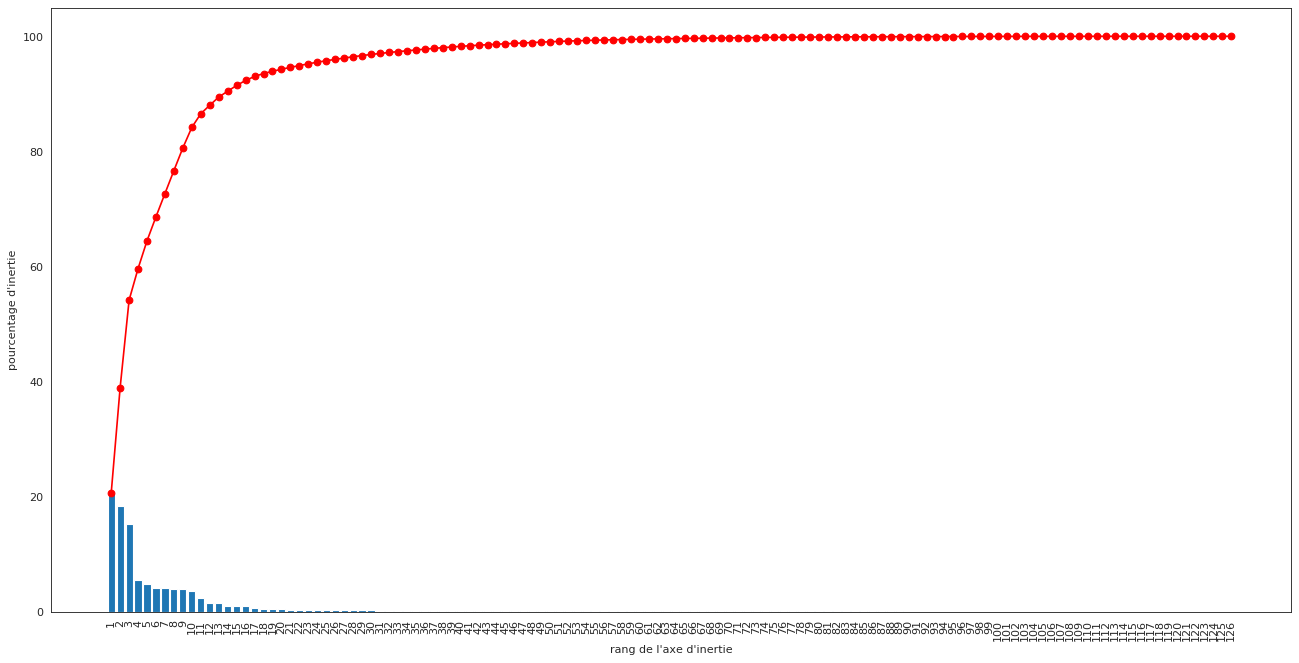

In [98]:
from sklearn import decomposition

# Calcul de l'ACP
acp = decomposition.PCA()
acp.fit(newX)

# Représentation des valeurs propres

vp = acp.explained_variance_ratio_*100
#print(vp)

fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.bar(np.arange(len(vp))+1, vp)
plt.plot(np.arange(len(vp))+1, vp.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.xticks(np.arange(len(vp))+1)

ax.set_xticklabels(np.arange(len(vp))+1,rotation=90)

plt.show()

In [99]:
sum(vp[0:20])

94.26948208464825

In [100]:
# Détermination du nombre de facteur à retenir (test des batons brisés)

## Détermination des valeurs propres
eigval = (newX.shape[0]-1)/newX.shape[0]*acp.explained_variance_

## Détermination des seuils
seuil = 1/np.arange(len(newX.columns),0,-1)
seuil = np.cumsum(seuil)
seuil[::-1]

testData= pd.DataFrame({'Eigen Values':eigval,'Thresold':seuil})

pd.options.display.max_rows = 130
testData

Eigen Values  Thresold
0    5.090043e+00  0.007937
1    4.558406e+00  0.015937
2    3.771668e+00  0.024001
3    1.358477e+00  0.032131
4    1.199293e+00  0.040328
5    1.035375e+00  0.048592
6    9.992442e-01  0.056926
7    9.918220e-01  0.065329
8    9.775826e-01  0.073804
9    8.825204e-01  0.082351
10   5.888799e-01  0.090971
11   3.662338e-01  0.099667
12   3.507209e-01  0.108439
13   2.542540e-01  0.117288
14   2.474816e-01  0.126217
15   2.168433e-01  0.135226
16   1.707814e-01  0.144317
17   1.271044e-01  0.153491
18   9.589398e-02  0.162750
19   8.801538e-02  0.172096
20   8.146559e-02  0.181530
21   7.715745e-02  0.191054
22   7.564479e-02  0.200669
23   6.947716e-02  0.210378
24   6.369890e-02  0.220182
25   5.828471e-02  0.230083
26   5.762590e-02  0.240083
27   5.581441e-02  0.250184
28   5.103663e-02  0.260388
29   4.694072e-02  0.270697
30   4.370108e-02  0.281114
31   4.144990e-02  0.291640
32   3.771805e-02  0.302279
33   3.607150e-02  0.313031
34   3.551932e-02  0.323901
35   3.452953e-02  0.334890
36   3.379653e-02  0.346001
37   3.099480e-02  0.357237
38   2.853964e-02  0.368601
39   2.748511e-02  0.380095
40   2.679351e-02  0.391723
41   2.359683e-02  0.403488
42   2.109216e-02  0.415392
43   2.048197e-02  0.427440
44   1.935080e-02  0.439636
45   1.832255e-02  0.451981
46   1.760017e-02  0.464481
47   1.729362e-02  0.477140
48   1.666984e-02  0.489960
49   1.632456e-02  0.502947
50   1.559431e-02  0.516105
51   1.460026e-02  0.529438
52   1.262311e-02  0.542952
53   1.218501e-02  0.556650
54   1.182331e-02  0.570539
55   1.072969e-02  0.584624
56   9.761576e-03  0.598910
57   8.754495e-03  0.613402
58   8.185442e-03  0.628108
59   7.071124e-03  0.643034
60   6.875491e-03  0.658185
61   6.562242e-03  0.673570
62   6.046268e-03  0.689195
63   5.874292e-03  0.705068
64   5.714879e-03  0.721197
65   5.560376e-03  0.737590
66   5.423878e-03  0.754257
67   5.134873e-03  0.771206
68   5.086310e-03  0.788447
69   4.793787e-03  0.805991
70   4.754993e-03  0.823848
71   4.595979e-03  0.842030
72   4.527529e-03  0.860549
73   4.130756e-03  0.879417
74   3.519000e-03  0.898647
75   3.488415e-03  0.918255
76   3.244073e-03  0.938255
77   3.220092e-03  0.958663
78   2.761105e-03  0.979497
79   2.498721e-03  1.000773
80   2.093142e-03  1.022512
81   2.057923e-03  1.044735
82   1.898700e-03  1.067462
83   1.863769e-03  1.090718
84   1.858705e-03  1.114527
85   1.738623e-03  1.138918
86   1.290305e-03  1.163918
87   1.276962e-03  1.189559
88   1.215593e-03  1.215874
89   1.192339e-03  1.242901
90   1.107566e-03  1.270679
91   1.050571e-03  1.299251
92   1.025607e-03  1.328662
93   1.003001e-03  1.358965
94   1.001523e-03  1.390215
95   8.734828e-04  1.422473
96   7.791324e-04  1.455807
97   7.275925e-04  1.490290
98   7.157716e-04  1.526004
99   6.700409e-04  1.563041
100  6.322968e-04  1.601502
101  5.420671e-04  1.641502
102  5.265638e-04  1.683169
103  5.131727e-04  1.726647
104  4.833822e-04  1.772102
105  3.895048e-04  1.819721
106  3.410361e-04  1.869721
107  2.993227e-04  1.922352
108  2.873797e-04  1.977908
109  2.866192e-04  2.036732
110  2.427063e-04  2.099232
111  1.965697e-04  2.165898
112  1.912365e-04  2.237327
113  1.492001e-04  2.314250
114  1.437332e-04  2.397583
115  1.433851e-04  2.488492
116  9.701822e-05  2.588492
117  4.992741e-05  2.699603
118  4.792558e-05  2.824603
119  4.789994e-05  2.967461
120  1.003834e-30  3.134127
121  9.824633e-32  3.334127
122  2.987653e-32  3.584127
123  2.987653e-32  3.917461
124  2.987653e-32  4.417461
125  9.085399e-33  5.417461

In [101]:
thrsld = 1+2*np.sqrt((len(newX.columns)-1)/(newX.shape[0]-1))
thrsld

1.154849976591331

A l'analyse des seuils issus du test des batons brisés, on peut dire que les 17 prémiers facteurs sont pertinents pour analyser nos données. Ils expliquent 93.38% de la variance totale

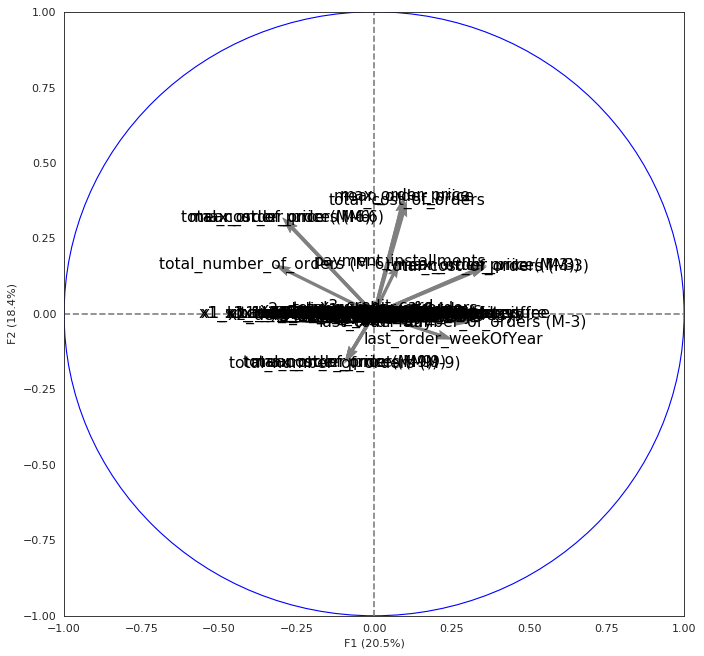

In [102]:
# Cercle de corrélation dans le premier plan factoriel (F1 et F2)

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

pcs = acp.components_

xmin, xmax, ymin, ymax = -1, 1, -1, 1

## Représentation des vecteurs
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[0,:], pcs[1,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

## Affichage des variables
labels = newX.columns
for i,(x, y) in enumerate(pcs[[0,1]].T):
    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', color="black")
                
## Affichage du cercle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

## Définition des limites du graphique
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
        
## Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

## Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(vp[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(vp[1],1)))

plt.show()

In [103]:
pcs_new = pcs[:,(abs(pcs[0,:]) > 0.25) | (abs(pcs[1,:]) > 0.25)]
labels = newX.columns[(abs(pcs[0,:]) > 0.25) | (abs(pcs[1,:]) > 0.25)]
labels

Index(['last_order_weekOfYear', 'total_cost_of_orders', 'max_order_price',
       'mean_order_price', 'total_number_of_orders (M-3)',
       'total_cost_of_orders (M-3)', 'max_order_price (M-3)',
       'mean_order_price (M-3)', 'total_number_of_orders (M-6)',
       'total_cost_of_orders (M-6)', 'max_order_price (M-6)',
       'mean_order_price (M-6)'],
      dtype='object')

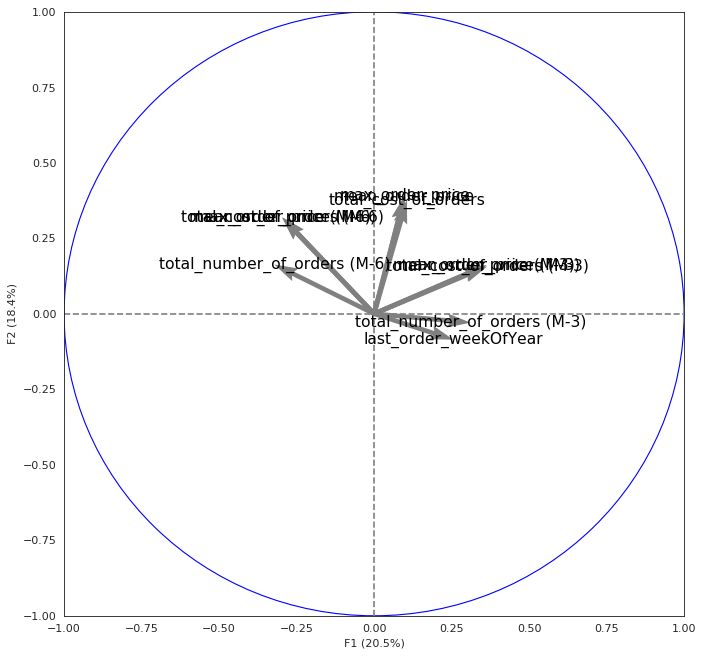

In [104]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

xmin, xmax, ymin, ymax = -1, 1, -1, 1

## Représentation des vecteurs
plt.quiver(np.zeros(pcs_new.shape[1]), np.zeros(pcs_new.shape[1]),
                   pcs_new[0,:], pcs_new[1,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

## Affichage des variables
for i,(x, y) in enumerate(pcs_new[[0,1]].T):
    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', color="black")
                
## Affichage du cercle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

## Définition des limites du graphique
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
        
## Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

## Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(vp[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(vp[1],1)))

plt.show()

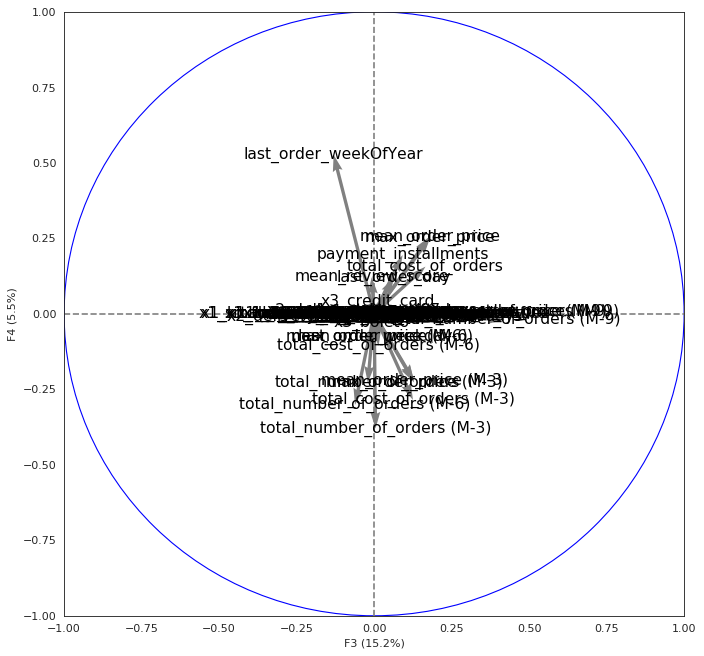

In [105]:
# Cercle de corrélation dans le deuxieme plan factoriel (F3 et F4)

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

pcs = acp.components_

xmin, xmax, ymin, ymax = -1, 1, -1, 1

## Représentation des vecteurs
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[2,:], pcs[3,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

## Affichage des variables
labels = newX.columns
for i,(x, y) in enumerate(pcs[[2,3]].T):
    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', color="black")
                
## Affichage du cercle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

## Définition des limites du graphique
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
        
## Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

## Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(3, round(vp[2],1)))
plt.ylabel('F{} ({}%)'.format(4, round(vp[3],1)))

plt.show()

In [106]:
pcs_new = pcs[:,(abs(pcs[2,:]) > 0.25) | (abs(pcs[3,:]) > 0.25)]
labels = newX.columns[(abs(pcs[2,:]) > 0.25) | (abs(pcs[3,:]) > 0.25)]
labels

Index(['last_order_weekOfYear', 'max_order_price', 'mean_order_price',
       'total_number_of_orders (M-3)', 'total_cost_of_orders (M-3)',
       'total_number_of_orders (M-6)', 'total_number_of_orders (M-9)',
       'total_cost_of_orders (M-9)', 'max_order_price (M-9)',
       'mean_order_price (M-9)'],
      dtype='object')

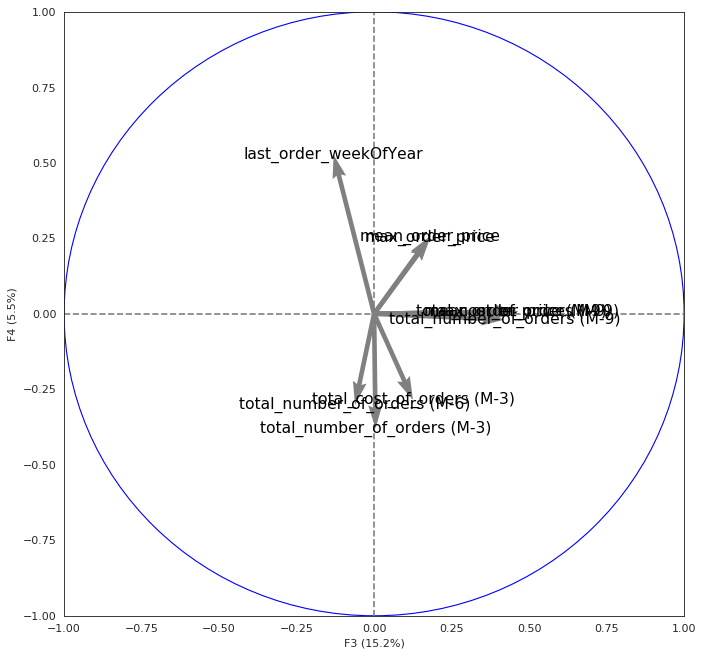

In [107]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

xmin, xmax, ymin, ymax = -1, 1, -1, 1

## Représentation des vecteurs
plt.quiver(np.zeros(pcs_new.shape[1]), np.zeros(pcs_new.shape[1]),
                   pcs_new[2,:], pcs_new[3,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

## Affichage des variables
for i,(x, y) in enumerate(pcs_new[[2,3]].T):
    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', color="black")
                
## Affichage du cercle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

## Définition des limites du graphique
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
        
## Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

## Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(3, round(vp[2],1)))
plt.ylabel('F{} ({}%)'.format(4, round(vp[3],1)))

plt.show()

### Application à la deuxième base de données

In [108]:
def clean_data(dataframe,date_ref):
    """Cette fonction calcule des métriques et nettoie les différentes variables obtenues. 
    Elle prend en argument un dataframe et une date de réference pour le calcul de certaines métriques."""
    
    dataframe0 = pd.DataFrame(index = dataframe['customer_unique_id'].unique())
    dataframe0.index.name = 'customer_unique_id'
    
    tampData = dataframe[['customer_unique_id','customer_city']].groupby(
        'customer_unique_id').agg(lambda x:x.value_counts().index[0])
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)
    
    tampData = dataframe[['customer_unique_id','customer_state']].groupby(
        'customer_unique_id').agg(lambda x:x.value_counts().index[0])
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)
    
    ## Date du dernier achat
    tampData = dataframe[['customer_unique_id','order_purchase_timestamp']].groupby('customer_unique_id').max()
    tampData.rename(columns={'order_purchase_timestamp':'last_order'},inplace=True)
    tampData['last_order_day'] = pd.to_datetime(tampData['last_order']).apply(lambda x: x.day)
    tampData['last_order_hour'] = pd.to_datetime(tampData['last_order']).apply(lambda x: x.hour)
    tampData['last_order_weekday'] = pd.to_datetime(tampData['last_order']).apply(lambda x: x.isoweekday())
    tampData['last_order_weekOfYear'] = pd.to_datetime(tampData['last_order']).apply(lambda x: x.isocalendar()[1])
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)

    ## Nombre d'achat par client
    tampData = dataframe[['customer_unique_id','order_id']].groupby('customer_unique_id').count()
    tampData.rename(columns={'order_id':'total_number_of_orders'},inplace=True)
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)

    ## Produit le plus acheté
    tampData = dataframe[['customer_unique_id','product_category_name_english']].dropna().groupby(
        'customer_unique_id').agg(lambda x: x.mode()[0])
    tampData.rename(columns={'product_category_name_english':'most_purchased_product'},inplace=True)
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)

    ## Note moyenne des commentaires
    tampData = dataframe[['customer_unique_id','review_score']].groupby(
        'customer_unique_id')['review_score'].mean()
    tampData.rename('mean_review_score',inplace=True)
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)

    ## Montant total des achats par client
    tampData = dataframe[['customer_unique_id',
                       'order_id','price']].groupby(['customer_unique_id', 
                                                     'order_id']).sum().groupby(['customer_unique_id']).sum()
    tampData.rename(columns={'price':'total_cost_of_orders'},inplace=True)
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)

    ## Montant maximum des achats par client
    tampData = dataframe[['customer_unique_id', 'order_id','price']].groupby(
        ['customer_unique_id','order_id'])['price'].max().groupby(['customer_unique_id']).max()
    tampData.rename('max_order_price',inplace=True)
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)
    
    ## Achat moyen du client sur la période
    tampData = dataframe[['customer_unique_id', 'order_id','price']].groupby(
        ['customer_unique_id','order_id'])['price'].mean().groupby(['customer_unique_id']).mean()
    tampData.rename('mean_order_price',inplace=True)
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)
    
    ## Comportement du client des 3,6,9 derniers mois par rapport à Août 2017
    tampData = compute_pastMonth_metrics(dataframe,date_ref)
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)
    
    ## Délai moyen de livraison
    tampData = dataframe[['customer_unique_id','delivery_days']].groupby(['customer_unique_id']).mean()
    tampData.rename(columns={'delivery_days':'mean_delivery_days'},inplace=True)
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)

    ## Moyen de paiement le plus utilisé
    tampData = dataframe[['customer_unique_id','payment_type']].dropna().groupby(
        'customer_unique_id').agg(lambda x: x.mode()[0])
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)
    
    ## Facilité de paiement moyen
    tampData = dataframe[['customer_unique_id','payment_installments']].groupby('customer_unique_id').mean()
    dataframe0 = pd.merge(dataframe0,tampData,how = 'left',left_index=True,right_index=True)

    ## Traitement des valeurs manquantes
    dataframe0['total_number_of_orders (M-3)'].fillna(0, inplace=True)
    dataframe0['total_cost_of_orders (M-3)'].fillna(0, inplace=True)
    dataframe0['max_order_price (M-3)'].fillna(0, inplace=True)
    dataframe0['mean_order_price (M-3)'].fillna(0, inplace=True)
    dataframe0['total_number_of_orders (M-6)'].fillna(0, inplace=True)
    dataframe0['total_cost_of_orders (M-6)'].fillna(0, inplace=True)
    dataframe0['max_order_price (M-6)'].fillna(0, inplace=True)
    dataframe0['mean_order_price (M-6)'].fillna(0, inplace=True)
    dataframe0['total_number_of_orders (M-9)'].fillna(0, inplace=True)
    dataframe0['total_cost_of_orders (M-9)'].fillna(0, inplace=True)
    dataframe0['max_order_price (M-9)'].fillna(0, inplace=True)
    dataframe0['mean_order_price (M-9)'].fillna(0, inplace=True)
    
    dataframe0['mean_delivery_days'].values[dataframe0['mean_delivery_days'] <= 7] = 1
    dataframe0['mean_delivery_days'].values[(dataframe0['mean_delivery_days'] > 7) & (dataframe0['mean_delivery_days'] <= 14)] = 2
    dataframe0['mean_delivery_days'].values[dataframe0['mean_delivery_days'] > 14 ] = 3
    dataframe0['mean_delivery_days'].fillna('unknown_delivery_days',inplace=True)
    dataframe0['mean_delivery_days'].replace(1,'delivery_days_le_7days',inplace=True)
    dataframe0['mean_delivery_days'].replace(2,'delivery_days_between_8&14days',inplace=True)
    dataframe0['mean_delivery_days'].replace(3,'delivery_days_gt_14days',inplace=True)

    dataframe0['most_purchased_product'].fillna('unknown_product',inplace=True)

    dataframe0.dropna(subset=['mean_review_score'],inplace=True)

    # Traitement des valeurs abérrantes
    for cols in dataframe0.columns:
        if dataframe0[cols].dtypes == 'float64':
            z = np.abs(stats.zscore(dataframe0[cols]))
            dataframe0[cols] = np.where(z<3,dataframe0[cols],np.nan)
    
    dataframe0.dropna(how='any', inplace=True)
    return dataframe0

In [109]:
date_ref = '2018-08-01 00:00:00'
new_data0 = clean_data(data2,date_ref)

/home/famien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [110]:
new_data0.isna().sum()

customer_city                   0
customer_state                  0
last_order                      0
last_order_day                  0
last_order_hour                 0
last_order_weekday              0
last_order_weekOfYear           0
total_number_of_orders          0
most_purchased_product          0
mean_review_score               0
total_cost_of_orders            0
max_order_price                 0
mean_order_price                0
total_number_of_orders (M-3)    0
total_cost_of_orders (M-3)      0
max_order_price (M-3)           0
mean_order_price (M-3)          0
total_number_of_orders (M-6)    0
total_cost_of_orders (M-6)      0
max_order_price (M-6)           0
mean_order_price (M-6)          0
total_number_of_orders (M-9)    0
total_cost_of_orders (M-9)      0
max_order_price (M-9)           0
mean_order_price (M-9)          0
mean_delivery_days              0
payment_type                    0
payment_installments            0
dtype: int64

### Stockage des données

In [111]:
new_data.to_csv('data2017.csv')
new_data0.to_csv('data2018.csv')

In [112]:
new_data0.head()

customer_city customer_state  \
customer_unique_id                                                
e87f0713f11e04c438f96adc52a333bb           assis             SP   
15dc82b7d6c3e536b3912c307fbfeaf6  santa quiteria             CE   
64bde37d045cf085cb670c5fe23f62e7         niteroi             RJ   
c0e0099353963aa2d4aeb0f79b564e1f  campina grande             PB   
9a70db677c8e4e9e25e36729362fe756        santiago             RS   

                                          last_order  last_order_day  \
customer_unique_id                                                     
e87f0713f11e04c438f96adc52a333bb 2017-12-04 21:52:54               4   
15dc82b7d6c3e536b3912c307fbfeaf6 2018-06-06 20:01:45               6   
64bde37d045cf085cb670c5fe23f62e7 2017-11-30 20:48:56              30   
c0e0099353963aa2d4aeb0f79b564e1f 2017-10-29 03:10:28              29   
9a70db677c8e4e9e25e36729362fe756 2017-09-28 19:31:57              28   

                                  last_order_hour  last_order_weekday  \
customer_unique_id                                                      
e87f0713f11e04c438f96adc52a333bb               21                   1   
15dc82b7d6c3e536b3912c307fbfeaf6               20                   3   
64bde37d045cf085cb670c5fe23f62e7               20                   4   
c0e0099353963aa2d4aeb0f79b564e1f                3                   7   
9a70db677c8e4e9e25e36729362fe756               19                   4   

                                  last_order_weekOfYear  \
customer_unique_id                                        
e87f0713f11e04c438f96adc52a333bb                     49   
15dc82b7d6c3e536b3912c307fbfeaf6                     23   
64bde37d045cf085cb670c5fe23f62e7                     48   
c0e0099353963aa2d4aeb0f79b564e1f                     43   
9a70db677c8e4e9e25e36729362fe756                     39   

                                  total_number_of_orders  \
customer_unique_id                                         
e87f0713f11e04c438f96adc52a333bb                       1   
15dc82b7d6c3e536b3912c307fbfeaf6                       1   
64bde37d045cf085cb670c5fe23f62e7                       1   
c0e0099353963aa2d4aeb0f79b564e1f                       1   
9a70db677c8e4e9e25e36729362fe756                       1   

                                 most_purchased_product  mean_review_score  \
customer_unique_id                                                           
e87f0713f11e04c438f96adc52a333bb    luggage_accessories                5.0   
15dc82b7d6c3e536b3912c307fbfeaf6    luggage_accessories                5.0   
64bde37d045cf085cb670c5fe23f62e7             stationery                5.0   
c0e0099353963aa2d4aeb0f79b564e1f    luggage_accessories                5.0   
9a70db677c8e4e9e25e36729362fe756             stationery                5.0   

                                  total_cost_of_orders  max_order_price  \
customer_unique_id                                                        
e87f0713f11e04c438f96adc52a333bb                139.90           139.90   
15dc82b7d6c3e536b3912c307fbfeaf6                369.99           369.99   
64bde37d045cf085cb670c5fe23f62e7                199.99           199.99   
c0e0099353963aa2d4aeb0f79b564e1f                319.99           319.99   
9a70db677c8e4e9e25e36729362fe756                199.90           199.90   

                                  mean_order_price  \
customer_unique_id                                   
e87f0713f11e04c438f96adc52a333bb            139.90   
15dc82b7d6c3e536b3912c307fbfeaf6            369.99   
64bde37d045cf085cb670c5fe23f62e7            199.99   
c0e0099353963aa2d4aeb0f79b564e1f            319.99   
9a70db677c8e4e9e25e36729362fe756            199.90   

                                  total_number_of_orders (M-3)  \
customer_unique_id                                               
e87f0713f11e04c438f96adc52a333bb                           0.0   
15dc82b7d6c3e536b3912c307fbfeaf6                           1.0 